In [ ]:
# Author: Shiqi Jiang
# Last Modified: 2/7/2022

In [ ]:
# Tryout on a collection of Sigmoid functions to simulate the Nearest Neighbour Distribution of empirical data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy.optimize import curve_fit
from scipy.special import erf
from matplotlib.ticker import FormatStrFormatter, LogFormatter

In [2]:
ER = np.genfromtxt(r"D:\file\Research\P-value\data\ATER")    # Generating array for empirical data from file.  ER has 499 data points
ERDD = np.genfromtxt(r"D:\file\Research\P-value\data\ATERDD") 
GEO = np.genfromtxt(r"D:\file\Research\P-value\data\ATGEO") 
GEOGD = np.genfromtxt(r"D:\file\Research\P-value\data\ATGEOGD") 
HGG = np.genfromtxt(r"D:\file\Research\P-value\data\ATHGG") 
SF = np.genfromtxt(r"D:\file\Research\P-value\data\ATSF") 
SFDD = np.genfromtxt(r"D:\file\Research\P-value\data\ATSFDD") 
Sticky = np.genfromtxt(r"D:\file\Research\P-value\data\ATSticky") 

In [ ]:
print(ER)
print(ER.shape)

In [ ]:
print(np.sqrt(np.sum(ER-ER[0])**2))

In [ ]:
# useless
a = np.array([[1,2,3,4,5],[3,4,5,6,7]])
b = np.array([1,1,1,1,1])
print(a-b)
x= (a-b)**2
print(x)
print(np.sqrt(np.sum(x,axis=1)))


In [14]:
# calculating empirical data's shortest(NN) distance 
# real data is high-dimensional data points

# Revised Version. Now output correct data distance
def data_distance(data):
    shortest_distance = [0]*len(data)
    for i in range(len(data)):
        x = np.delete(data,i,0)
        temp = (x-data[i])**2
        d = np.sqrt(np.sum(temp,axis=1))
        shortest_distance[i] = d.min()
    
    return np.array(shortest_distance)   # return an array of real data's NN distance

# plotting empirical data's NN hist
def plot_data_distance(D, title):
    """
    D: an array of real data' NN distance
    """
    f, ax = plt.subplots(1,1, figsize = (8,6))
    ax.hist(D,edgecolor='white',bins=50)   ## consider specifying <bins>
    ax.set_title(title)
    plt.show()
    return

In [ ]:
print(data_distance(ER))

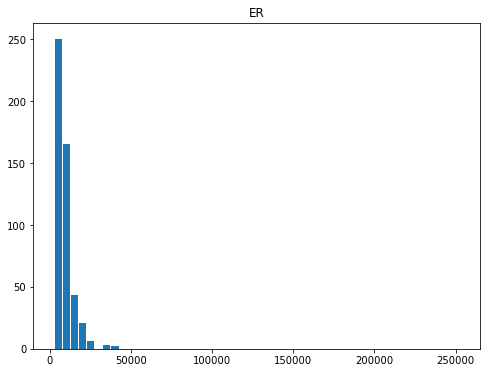

In [11]:
empirical_NN = data_distance(ER)
plot_data_distance(empirical_NN,"ER")

In [ ]:
empirical_NN = data_distance(ER)
plot_data_distance(empirical_NN,"ER")
h = plt.hist(empirical_NN,bins=499,density=True,cumulative=True)
x = h[1]
y = h[0]
print(x.shape)
print(y.shape)

In [ ]:
print(np.median(empirical_NN))

In [17]:
# plot CDF of empirical data
def plot_empirical_CDF(data, Density,title):
    f, ax = plt.subplots(1,1,figsize=(6,4))
    h = ax.hist(data,bins=len(data),density=Density,cumulative=True,histtype='stepfilled')    # bins set to equal to # of empirical data
    x = h[1][:-1]
    y = h[0]
    ax.plot(x,y,color='k', label='Empirical')
    ax.set_title(title)
    ax.legend()
    plt.show()
    return x,y

In [18]:
# plot CDF of empirical data + fitted Sigmoid
def plot_sigmoid(data,Density, func, param):
    f, ax = plt.subplots(1,1,figsize=(10,8))
    h = ax.hist(data,bins=499,density=Density,edgecolor='white',cumulative=True,histtype='step')
    x = h[1][:-1]
    y = h[0]

    y2 = func(x/1e7,*param)    # by func curve_fit
    #ax.plot(x,y,color='k', label='Empirical')
    #ax.plot(x,y2,color='r',label='sigmoid')
    ax.set_yscale('log')
    #ax.plot(x[:-100],1-y[:-100],color='g',label='1-empirical')
    ax.scatter(x,1-y,color='g',label='1-empirical')
    ax.plot(x,1-y2,color='y',label='1-sigmoid')
    ax.legend(loc='upper left')
    plt.show()
    return x,y,y2

In [ ]:
# plot empirical CDF
x,y = plot_empirical_CDF(empirical_NN, True, "ER")

In [ ]:
# empirical_NN start and end
print(x[0],x[-1])

In [ ]:
# Curve_fit
p0 = [np.median(empirical_NN)/1e7,1] # this is initial guess for curve_fit()

popt, pcov = curve_fit(f=logistic, xdata=x/1e7, ydata=y, p0=p0,method='lm')

# parameters yielded by Curve_fit: x0, k , b
print(popt)

y2 = logistic(x/1e7, *popt)
plt.plot(x/1e7,y2)
plt.show()

In [ ]:
x3 = np.arange(-2.8,2.8,0.1)
y3 = logistic(x3,*popt)
plt.plot(x3,y3)
plt.show()

In [ ]:
# plot fitted sigmoid
# by Curve_fit
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=popt) 

In [ ]:
# plot fitted sigmoid
# change growth rate k by hand
# param = [x0, k ,b]
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=[0.93056633,3.9])
print(y[-1],y2[-1])

In [ ]:
x,y,y2 = plot_sigmoid(empirical_NN,Density=True,func=logistic,param=[0.93056633,4.1])
print(y[-1],y2[-1])

In [ ]:
# head y-value
print(x[0],y[0],y2[0],x[-1])

In [ ]:
# tail y-value
print(y[-1],y2[-1])

In [ ]:
def MSE(y,y2):
    return np.mean((y2-y)**2)

In [ ]:
print(MSE(y,y2))

## all AT in one figure (empirical + sigmoid for each at-)
## 1.23

In [3]:
data_list = [ER,ERDD,GEO,GEOGD,HGG,SF,SFDD,Sticky]      # all read-in empirical AT data
data_name = ['ER','ERDD','GEO','GEOGD','HGG','SF','SFDD','Sticky']

In [4]:
factor = [1e5,1e7,1e4,1e7,1e13,1e8,1e9,1e9]
colors = ['b','g','r','c','m','y','k','brown']

In [19]:
# Curve_fit 2.0: function 

def auto_curve_fit(data_NN, x, y, x_scale_factor, func):
    p0 = [np.median(data_NN)/x_scale_factor,1] # this is initial guess for curve_fit()

    popt, pcov = curve_fit(f=func, xdata=x/x_scale_factor, ydata=y, p0=p0,method='lm')

    # parameters yielded by Curve_fit: x0, k
    print(popt)
    return popt

In [20]:
# 2.0:  Plot 1-empirical_CDF and 1-sigmoid
def plot_pair(x, y, x_scale_factor, func, param, name, color):
    '''
    x,y: empirical_NN and probability value
    x_scale_factor: scaling factor observed to avoid func overflowing
    func: sigmoid function
    param: parameters generated by Curve_fit()
    '''
    f,ax = plt.subplots(1,1,figsize=(8,30))
    y2 = func(x/x_scale_factor, *param)
    
    ax.set_yscale('log')
    ax.tick_params(axis='y', which='minor')
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.5e"))
    ax.scatter(x,1-y, color=color,marker='.')
    ax.plot(x,1-y2, color=color, label=name)
    
    ytick = ax.get_yticks()
    ax.legend(loc='upper left')
    plt.show()
    return ytick
    

In [21]:
def sigmoid_preview(func,x,x_scale_factor,popt,name):
    y2 = func(x/x_scale_factor, *popt)
    plt.plot(x/x_scale_factor,y2)
    plt.title(name)
    plt.show()

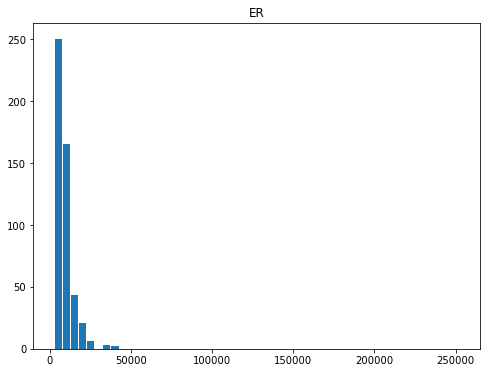

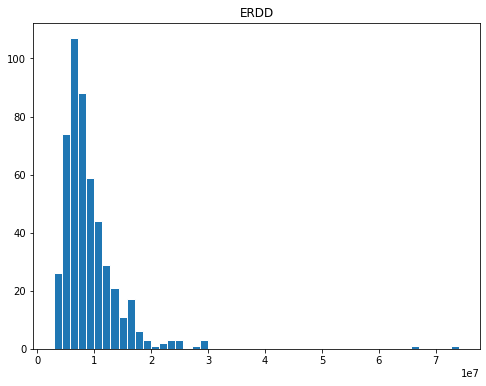

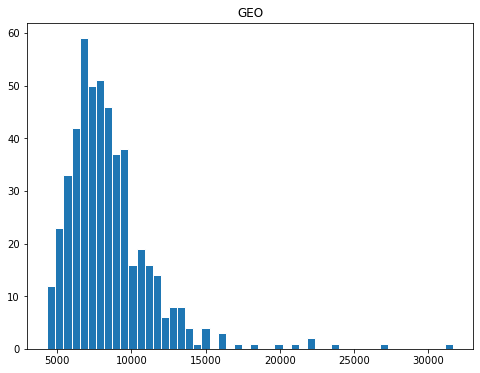

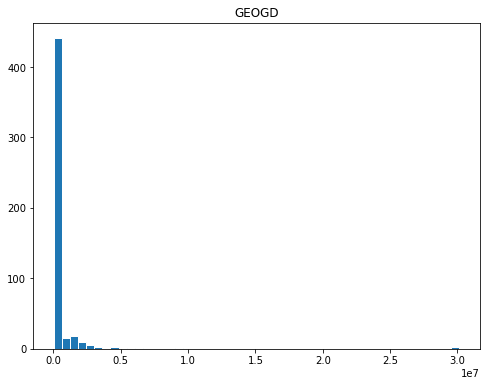

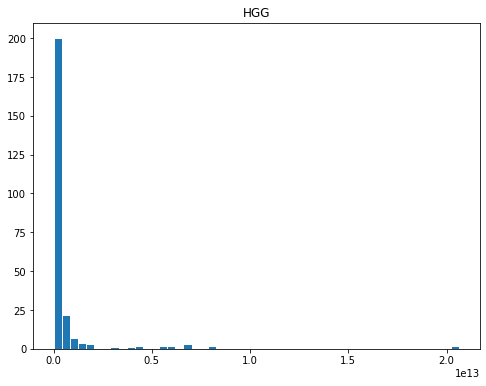

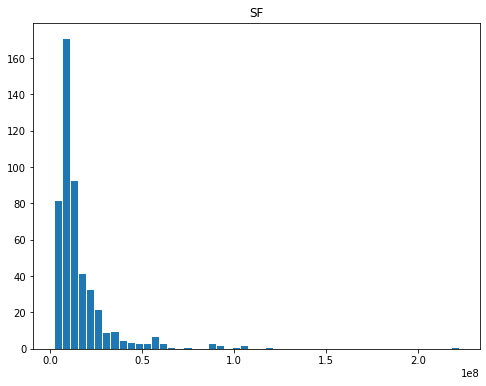

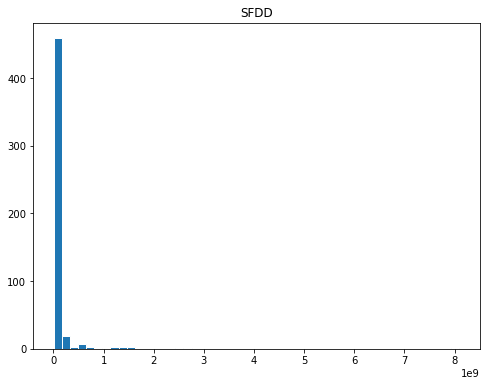

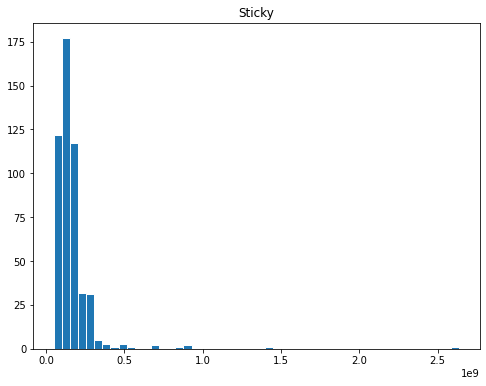

In [12]:
# empirical NN
for i in range(8):
    NN = data_distance(data_list[i])
    plot_data_distance(NN,data_name[i])

In [22]:
# For each AT: Empirical CDF + Sigmoid Preview + CDF-Sigmoid Pair
def cdf_sigmoid_pair(data_list,data_name,factor,colors,function):
    x_s = [0]*8
    y_s = [0]*8
    popt_s = [0]*8

    for i in range(len(data_list)):
        NN_i = data_distance(data_list[i])
        x_s[i],y_s[i] = plot_empirical_CDF(NN_i,True,data_name[i])
        popt_s[i] = auto_curve_fit(NN_i, x_s[i], y_s[i], factor[i],function)
        sigmoid_preview(function, x_s[i],factor[i],popt_s[i],data_name[i])
        plot_pair(x_s[i],y_s[i],factor[i],function,popt_s[i],data_name[i],colors[i]) 
    
    return x_s, y_s, popt_s

In [23]:
# All CDF-Sigmoid Pairs in one image.
def pair_in_one(data_name, factor, colors, function, x_s, y_s, popt_s):
    f,ax = plt.subplots(1,1,figsize=(20,10))
    ax.set_yscale('log')
    ax.set_xscale('log')
    for j in range(8):
        y2 = function(x_s[j]/factor[j],*popt_s[j])
        ax.scatter(x_s[j],1-y_s[j],color=colors[j],marker='.')
        ax.plot(x_s[j],1-y2, color=colors[j],label=data_name[j])
    ax.legend(loc='lower left')
    plt.show()

### 1. Sigmoid Function: Logistic

In [24]:
def logistic(x,x0, k):
    m = (1/ (1 + np.exp(-k*(x-x0))))       # b to better fit left end since it does not reach 0
    return m

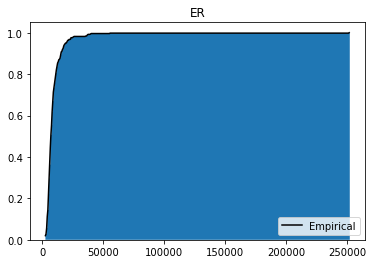

[ 0.07465467 43.17567523]


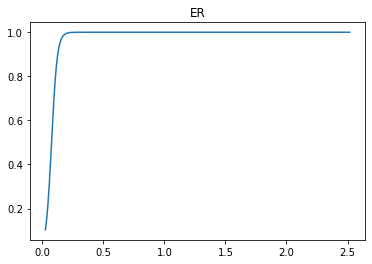

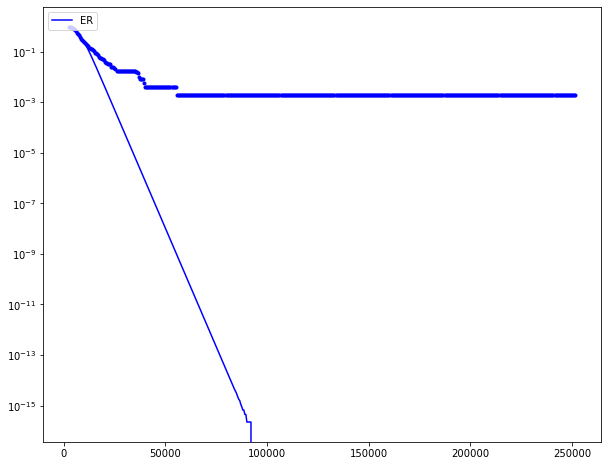

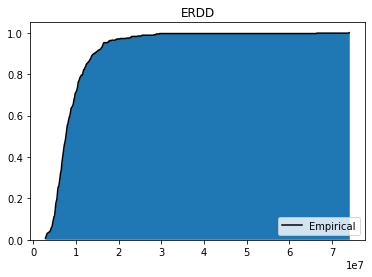

[0.81652247 4.63713021]


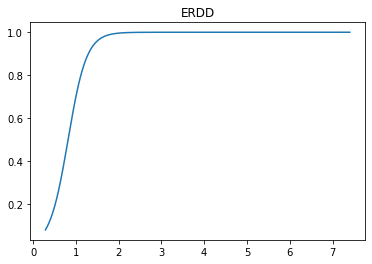

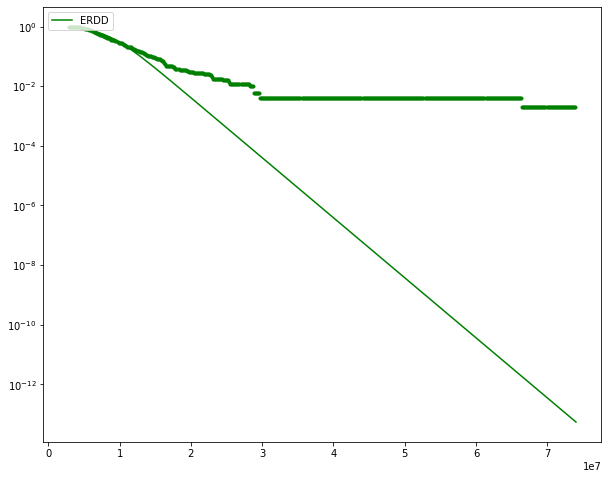

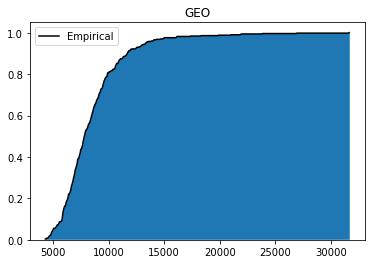

[0.80784389 7.41659107]


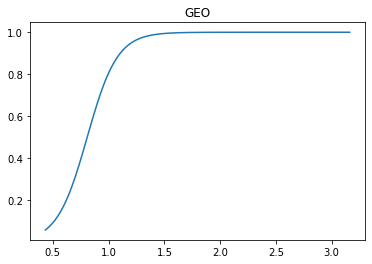

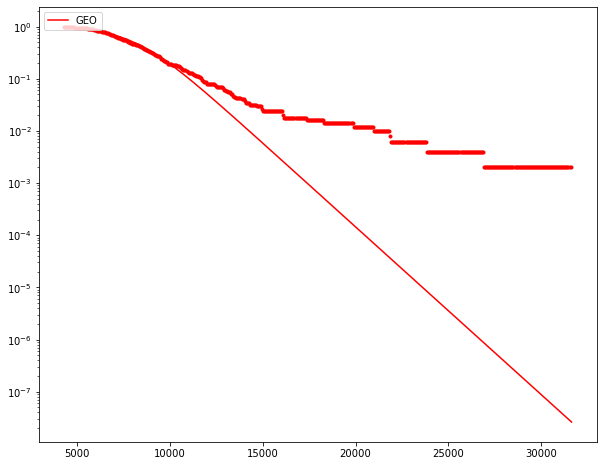

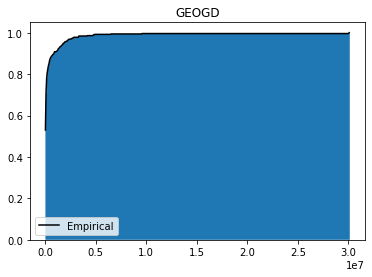

[-0.08236158 12.20545962]


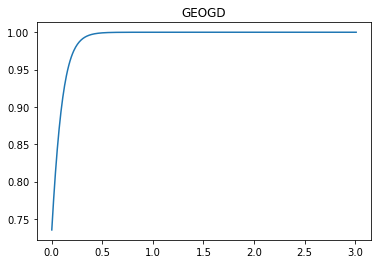

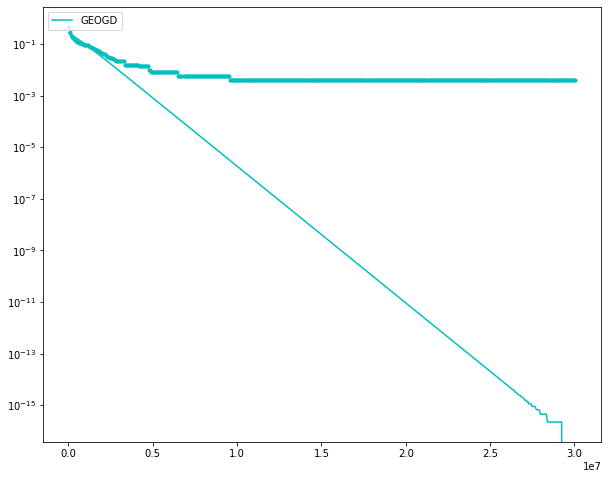

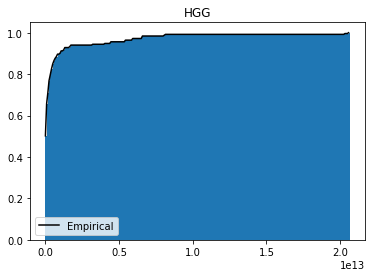

[-0.11800555  8.29253323]


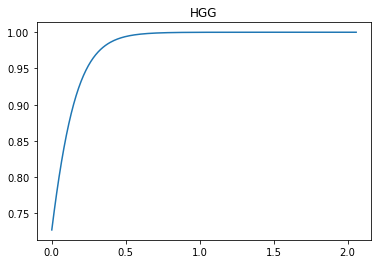

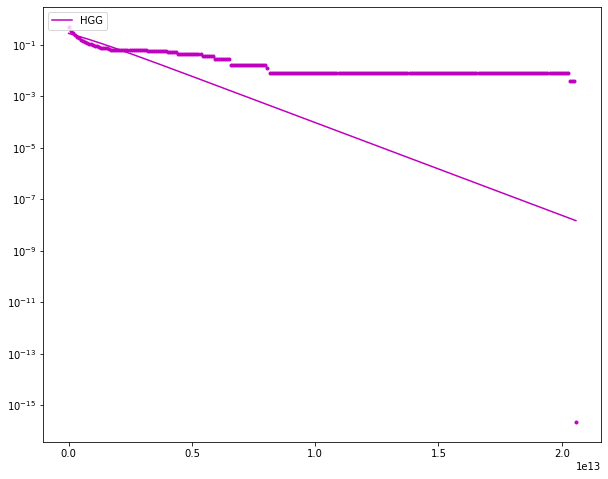

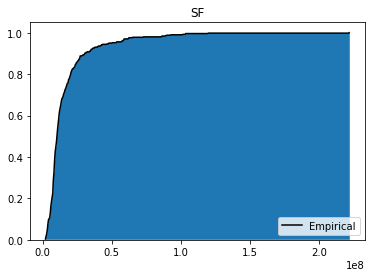

[ 0.11952271 18.45785165]


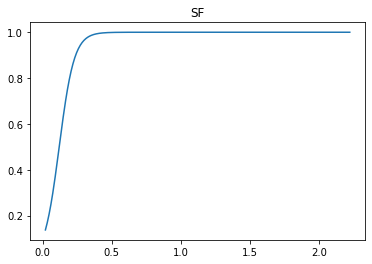

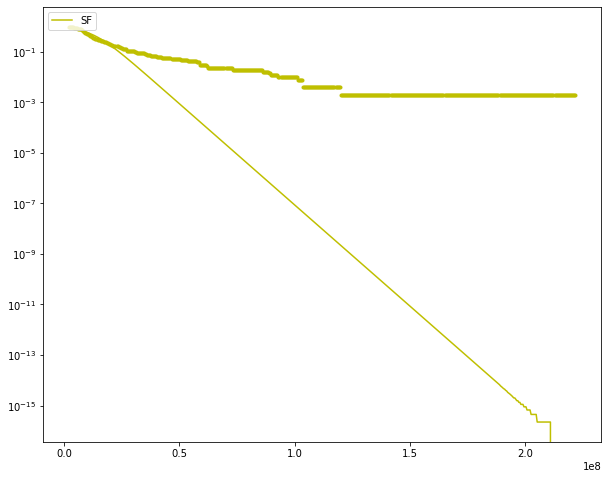

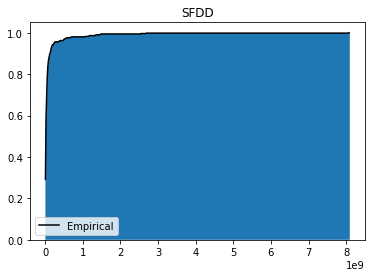

[1.57648158e-02 2.70995691e+01]


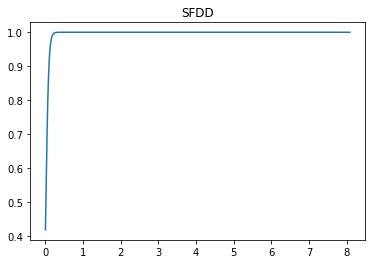

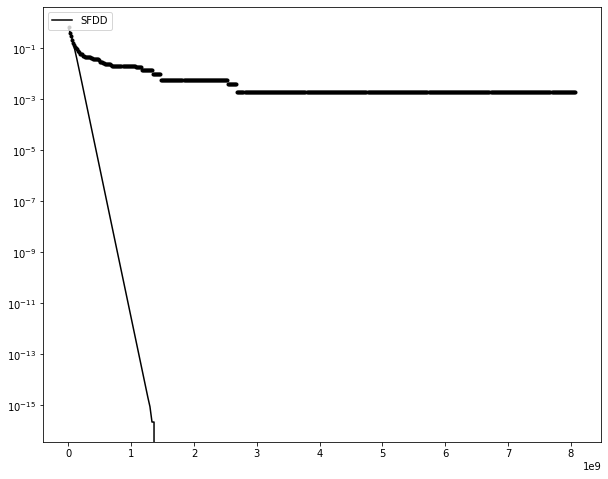

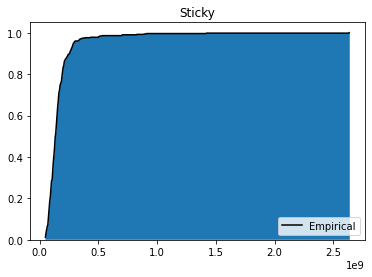

[ 0.13829861 26.50717203]


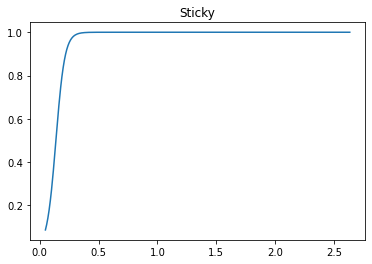

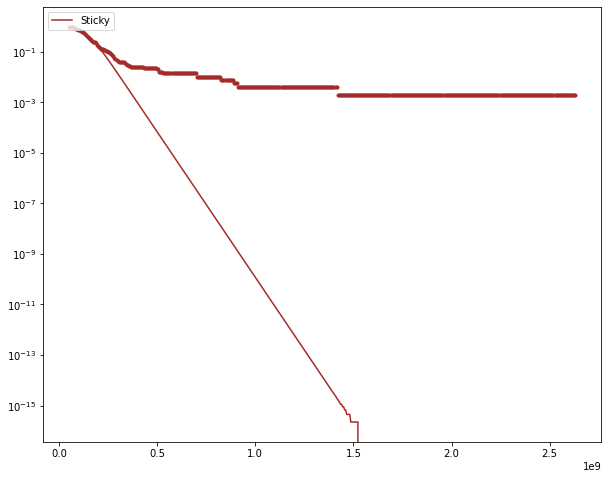

In [34]:
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, logistic)   

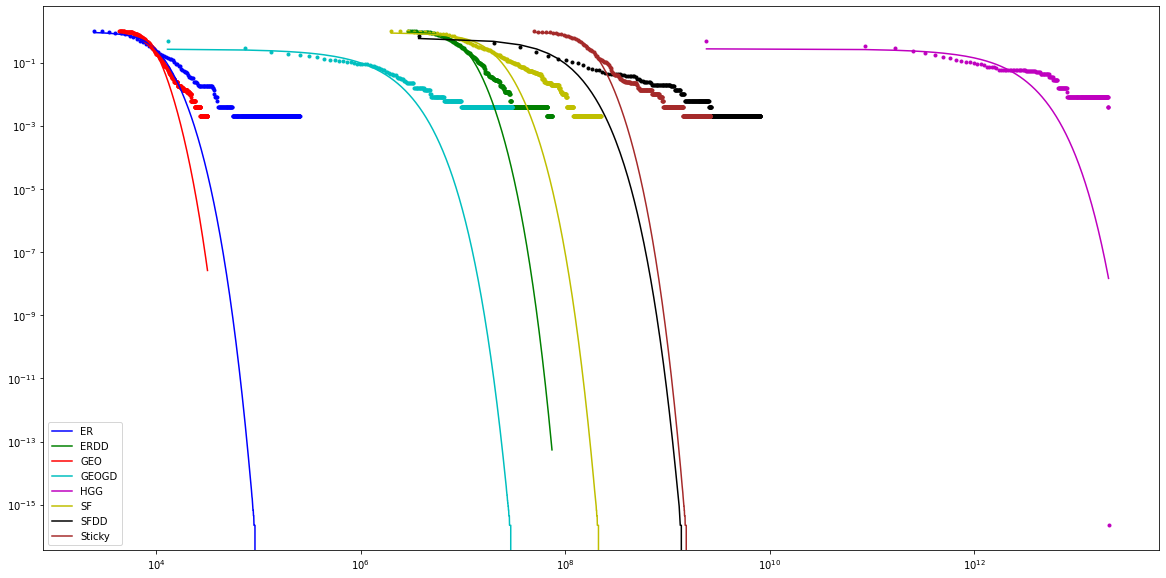

In [36]:
pair_in_one(data_name, factor, colors, logistic, x_s, y_s, popt_s)

### 2. Sigmoid Function: tanh

In [25]:
def tanh(x, x0, k):
    m = np.tanh(k*(x-x0))
    return m

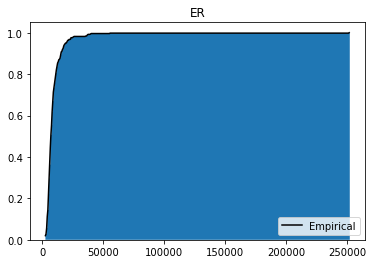

[ 0.02842331 13.02519022]


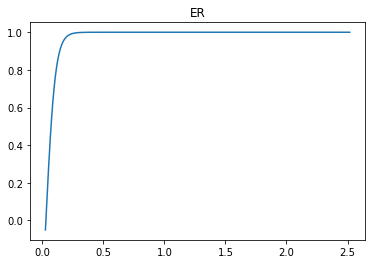

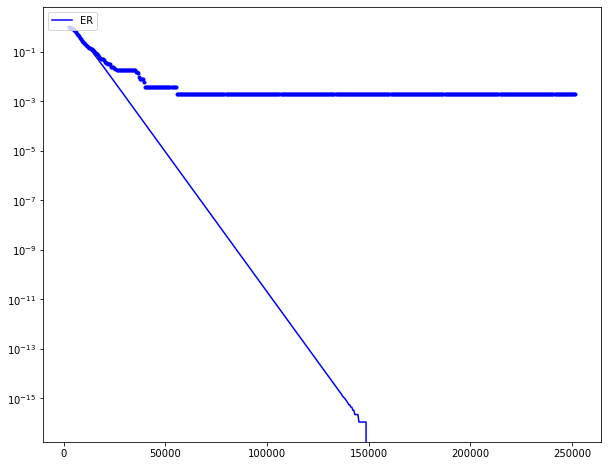

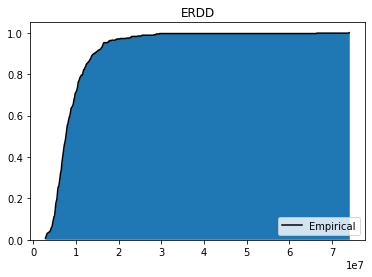

[0.36412643 1.35501543]


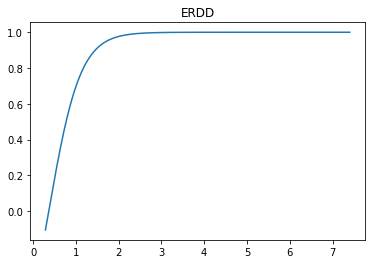

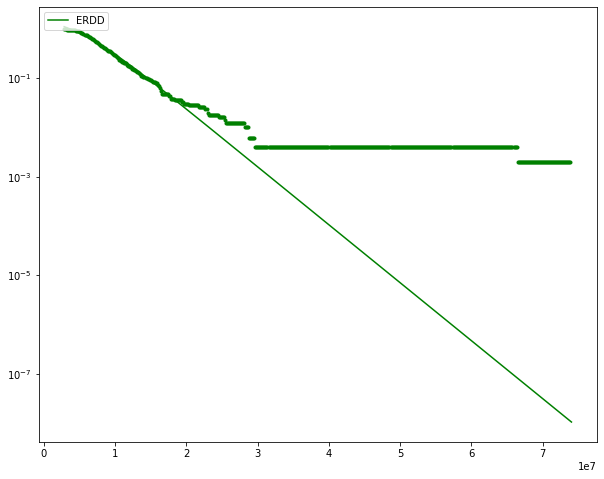

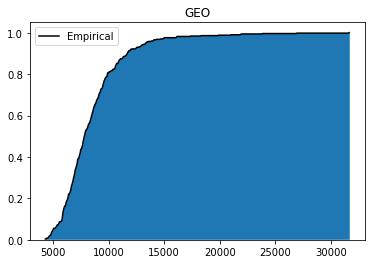

[0.50222387 2.0340863 ]


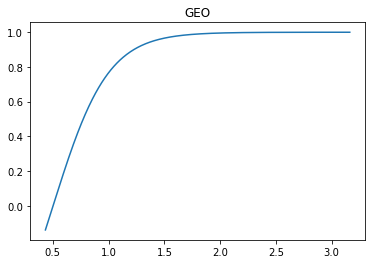

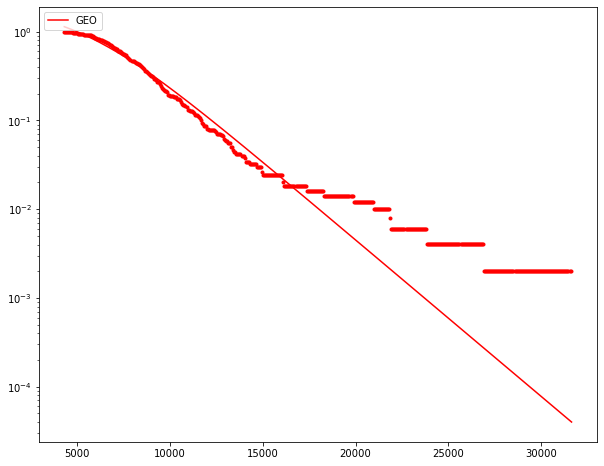

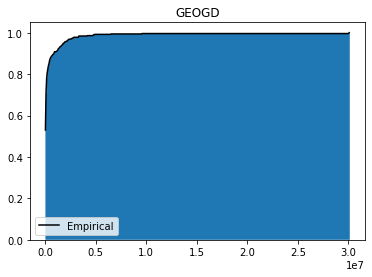

[-0.15691879  5.81957196]


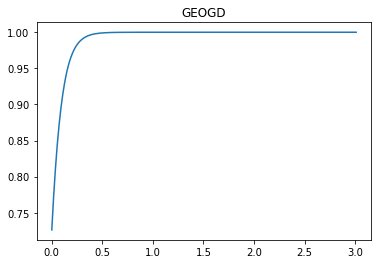

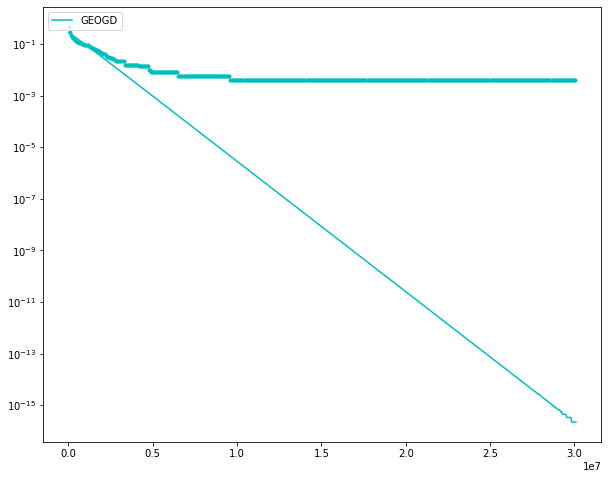

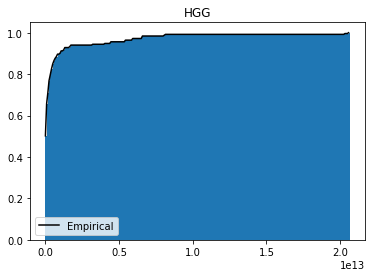

[-0.21769571  4.08789947]


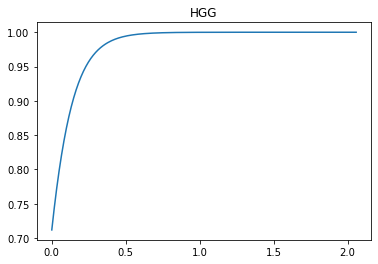

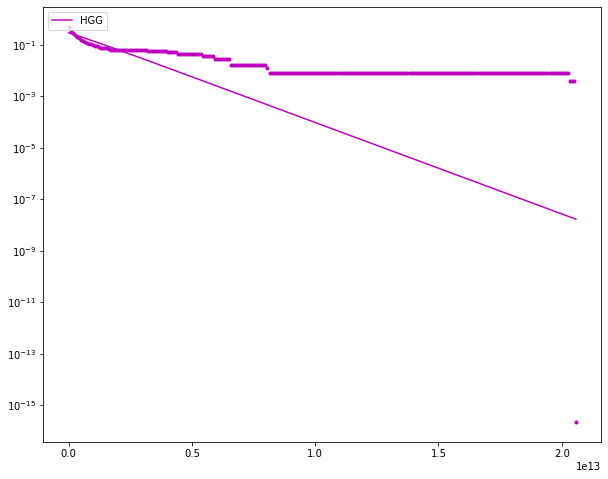

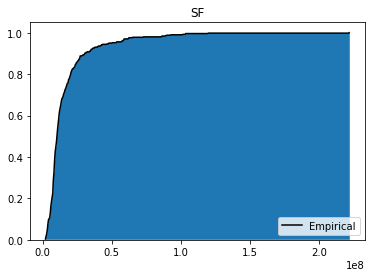

[0.02156267 6.01285351]


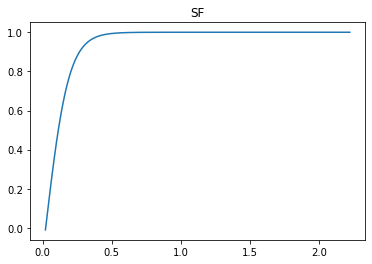

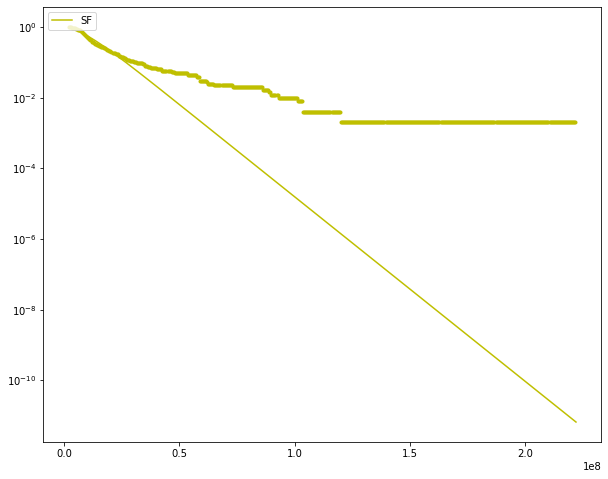

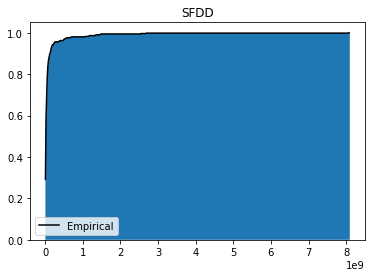

[-0.0333008  10.98274266]


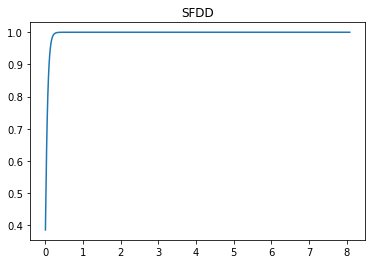

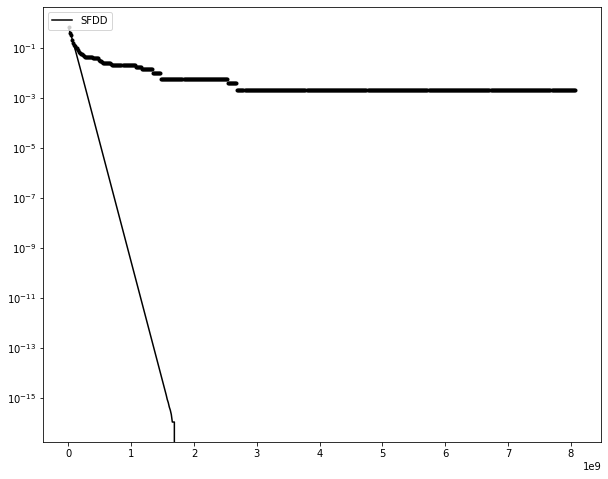

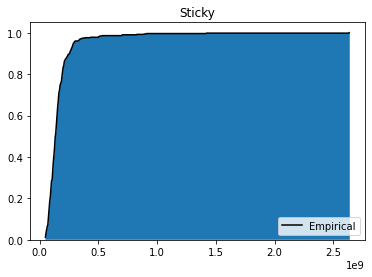

[0.05886    7.72267841]


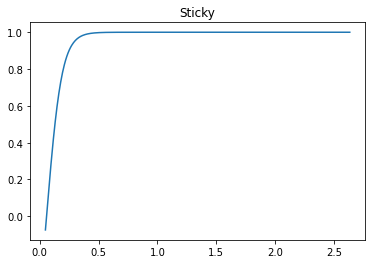

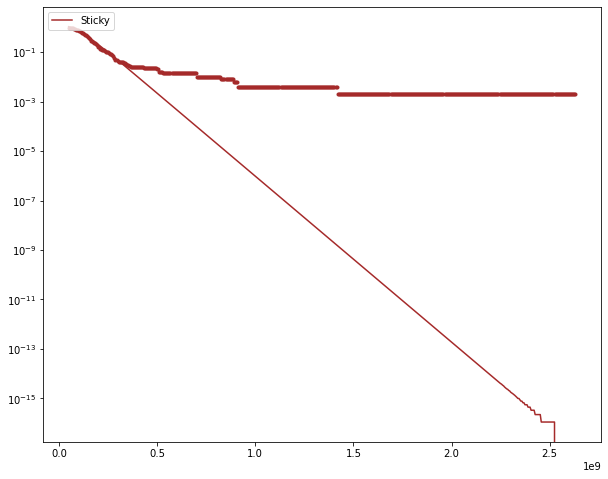

In [37]:
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, tanh)   

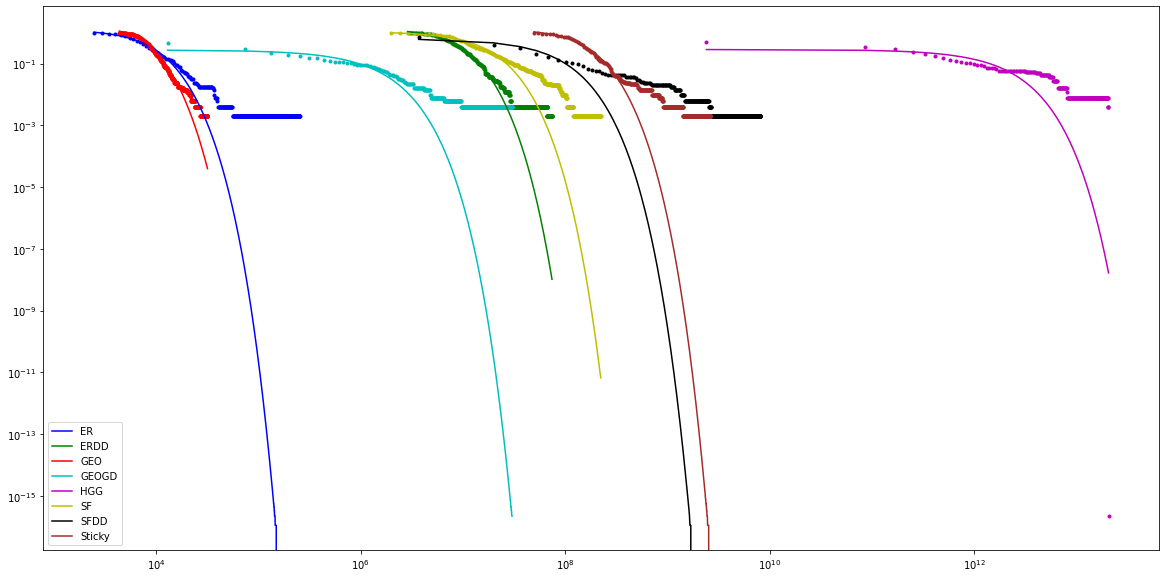

In [38]:
pair_in_one(data_name, factor, colors, tanh, x_s, y_s, popt_s)

### 3. Sigmoid Function: arctan

In [18]:
def arctan(x, x0, k):
    m = (2/np.pi)*np.arctan(k*(x-x0))
    return m

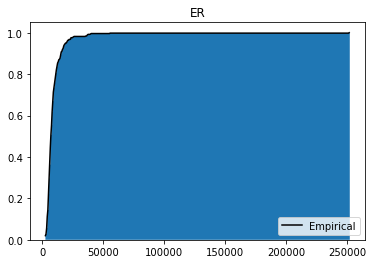

[3.42057868e-02 3.87487551e+01]


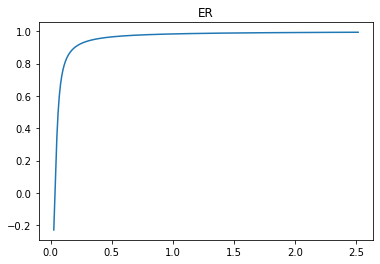

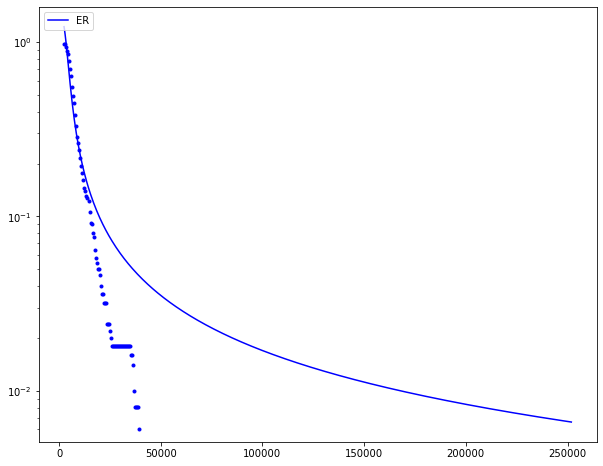

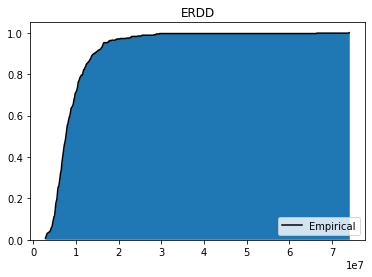

[0.40845096 3.84138219]


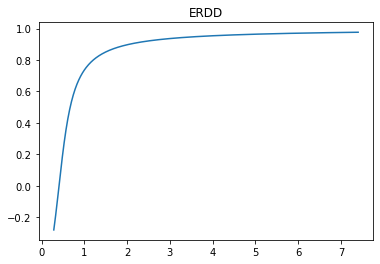

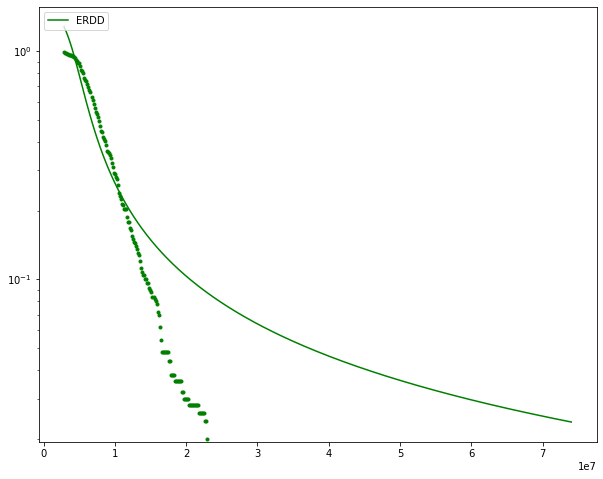

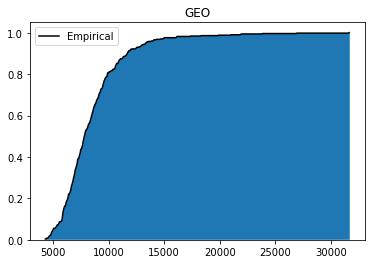

[0.52402224 5.41490134]


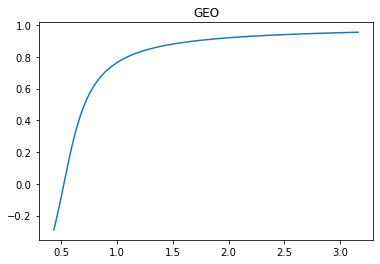

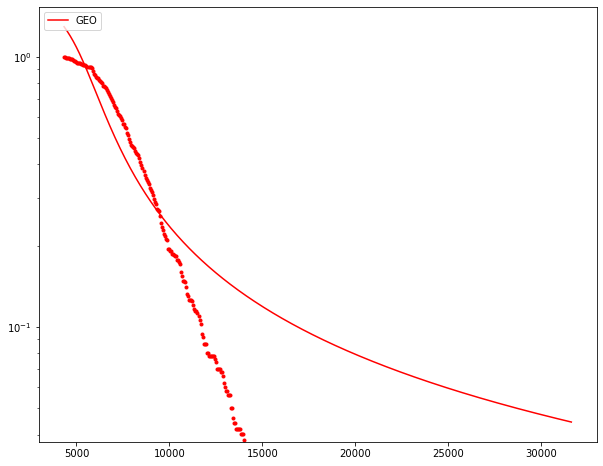

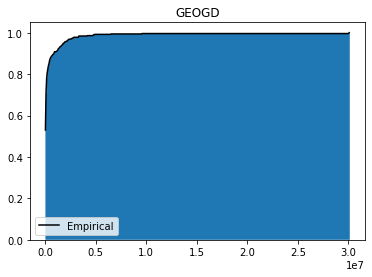

[-1.49636110e-02  7.92701225e+01]


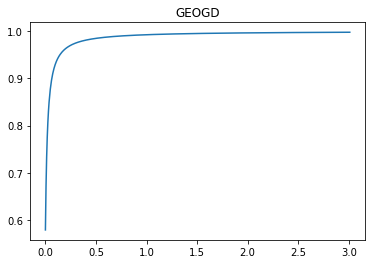

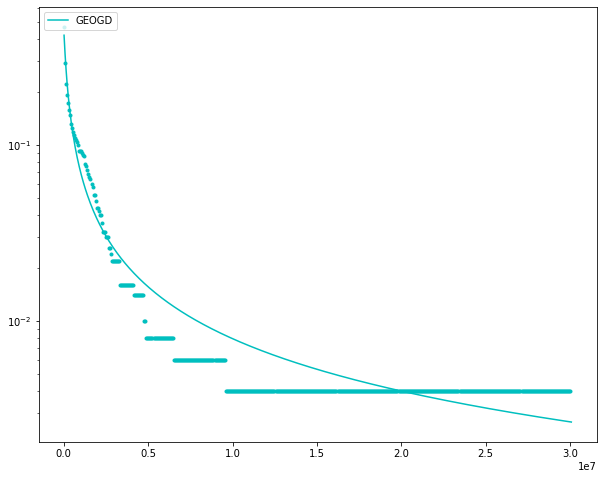

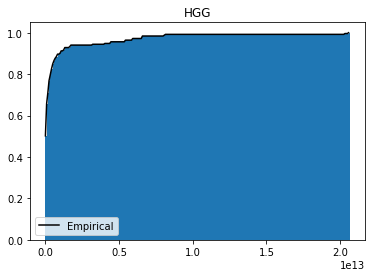

[-2.29589020e-02  4.96140593e+01]


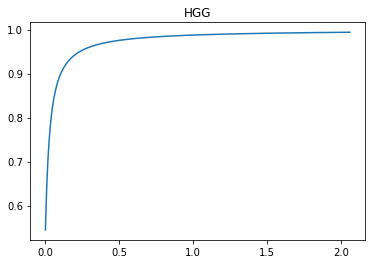

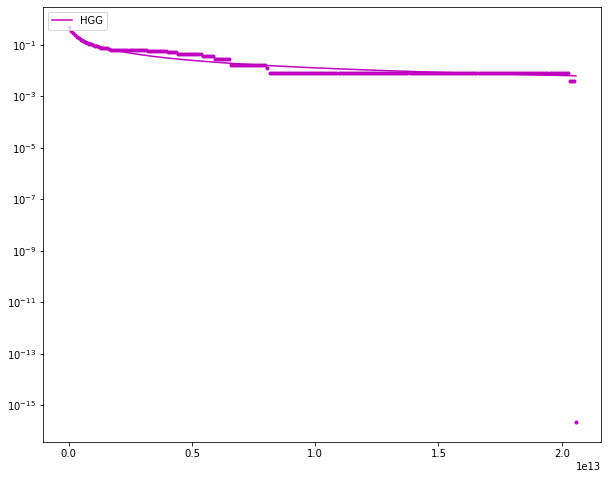

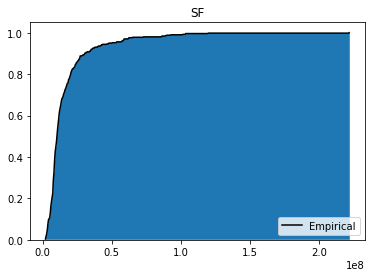

[ 0.03805917 18.44517762]


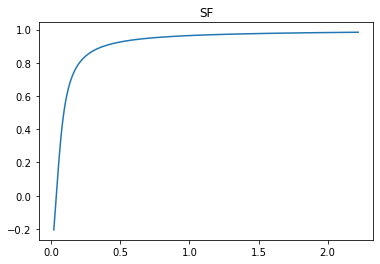

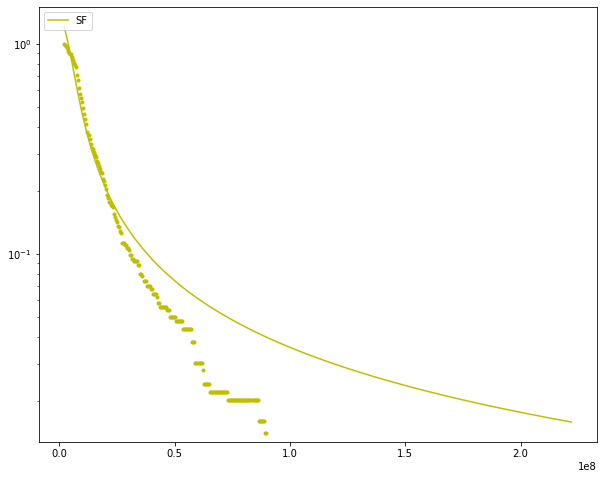

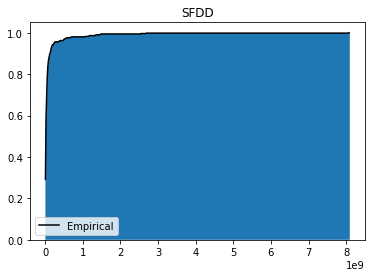

[-6.79642283e-03  4.74824310e+01]


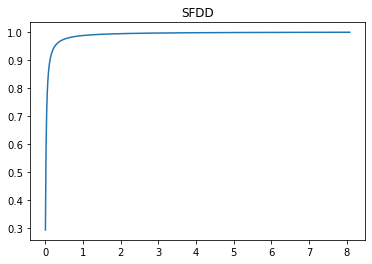

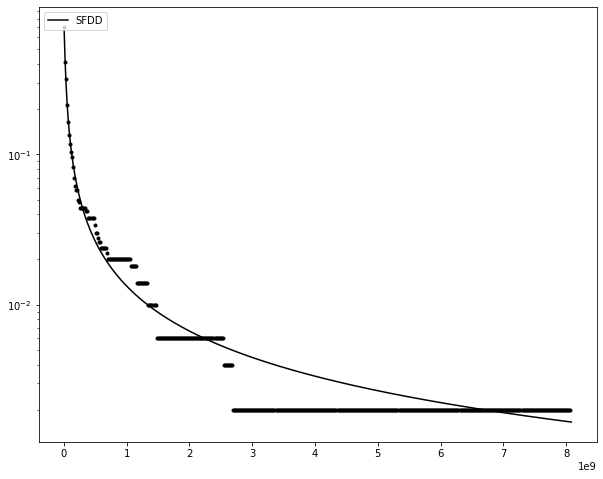

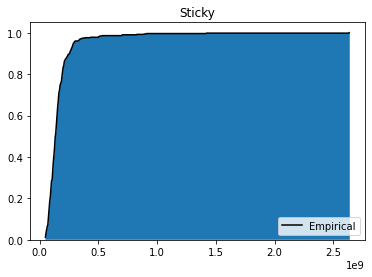

[ 0.06715629 22.2557245 ]


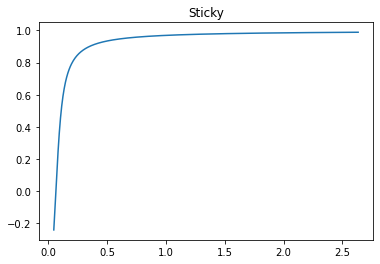

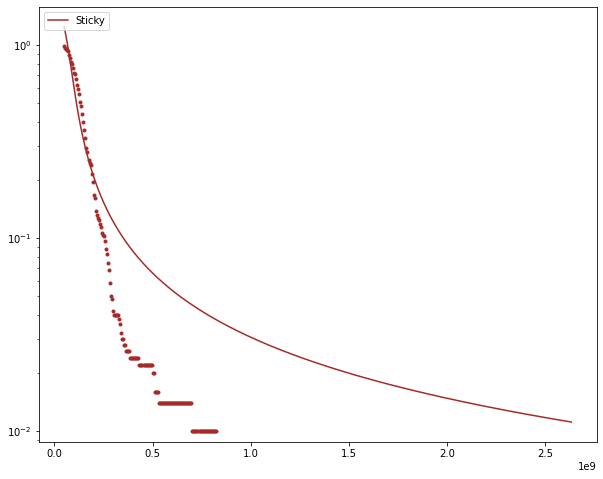

In [40]:
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, arctan) 

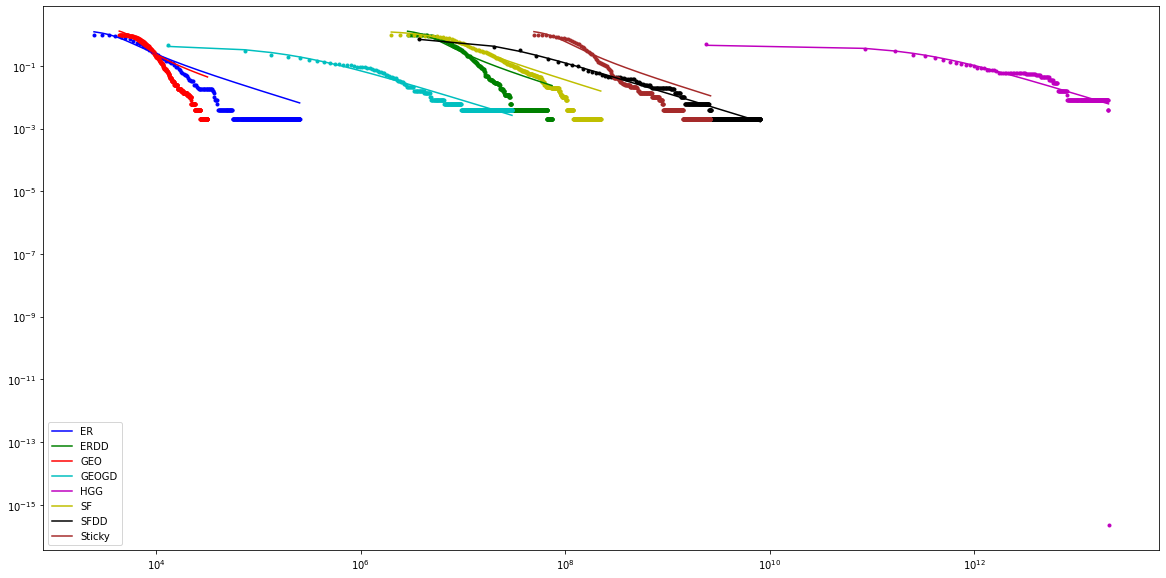

In [41]:
pair_in_one(data_name, factor, colors, arctan, x_s, y_s, popt_s)

### 4. Sigmoid Function: Gudermannian

In [19]:
def GD(x, x0, k):
    m = (4/np.pi)*np.arctan(np.tanh(k*(x-x0)))
    return m

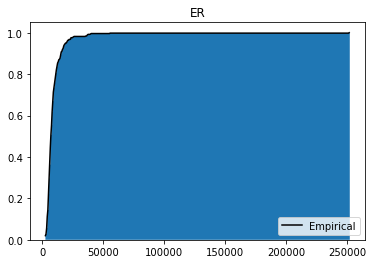

[ 0.02933146 10.92868226]


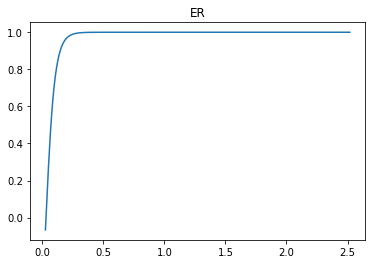

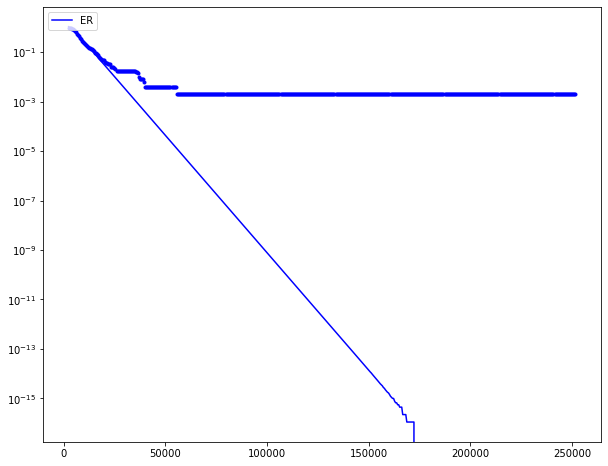

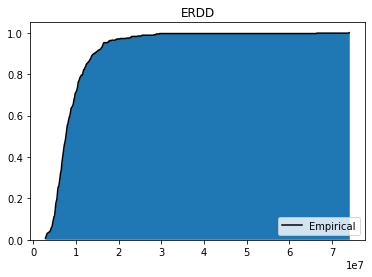

[0.37159575 1.13570508]


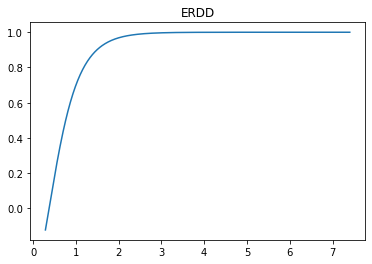

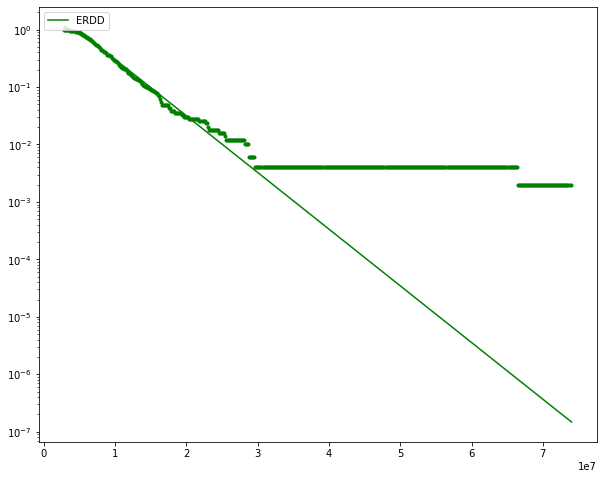

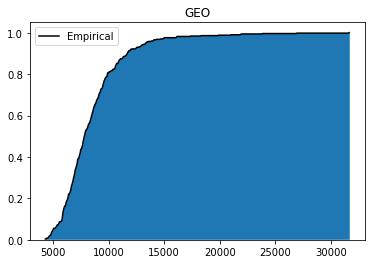

[0.50614617 1.69880357]


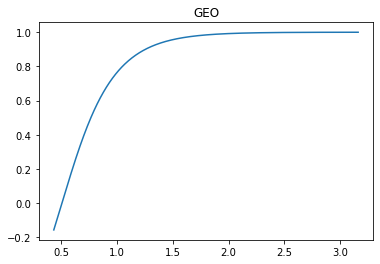

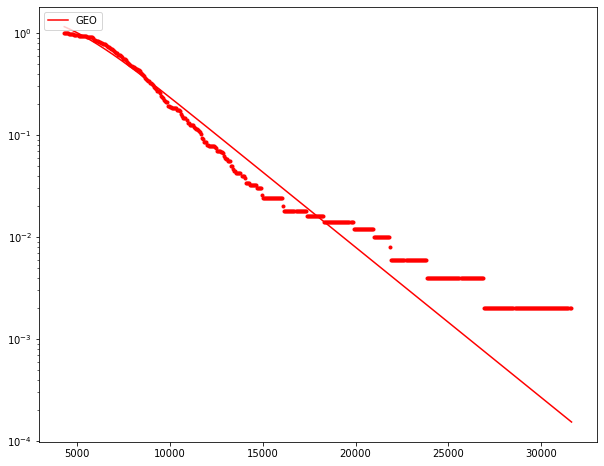

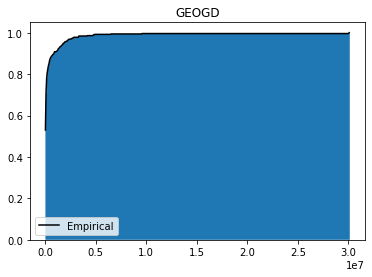

[-0.13334634  5.56880816]


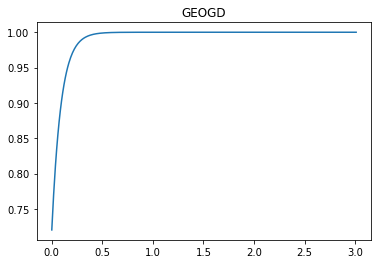

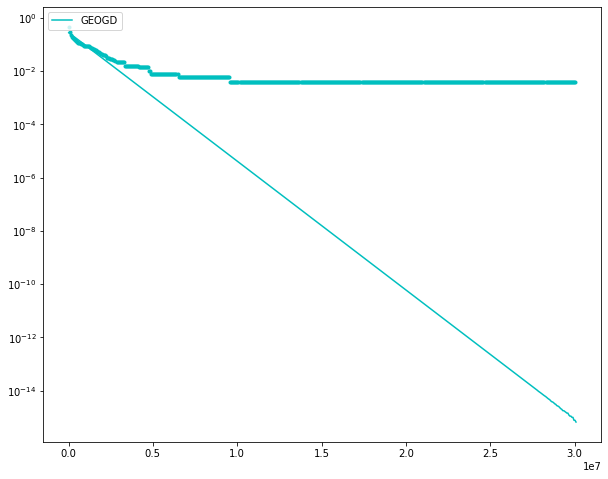

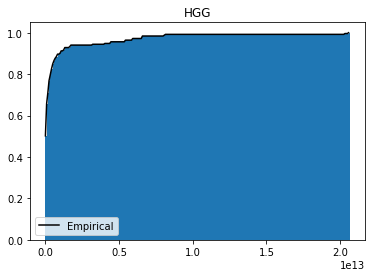

[-0.18243653  3.9368411 ]


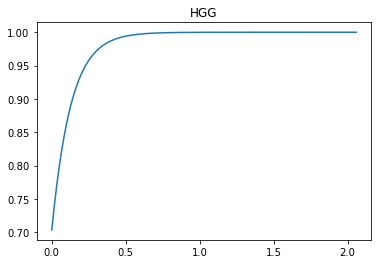

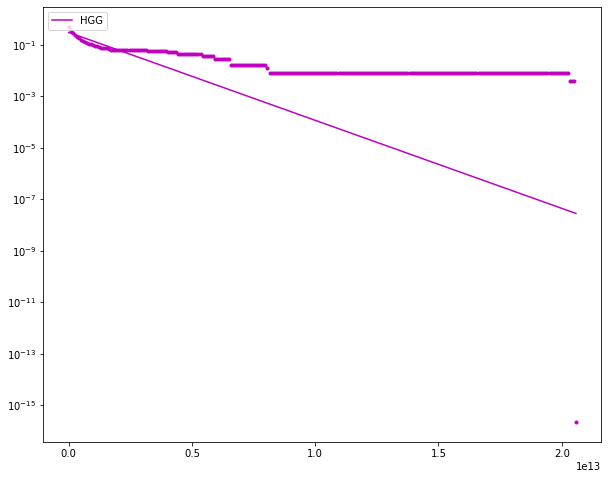

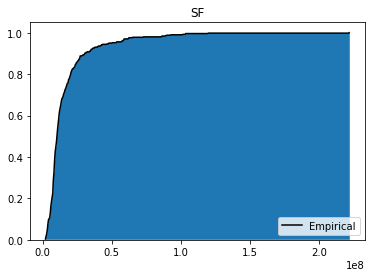

[0.02407424 5.05890304]


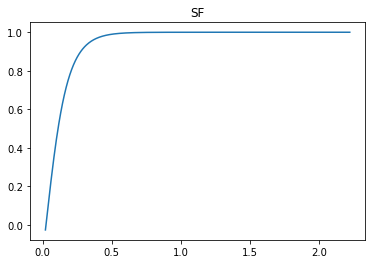

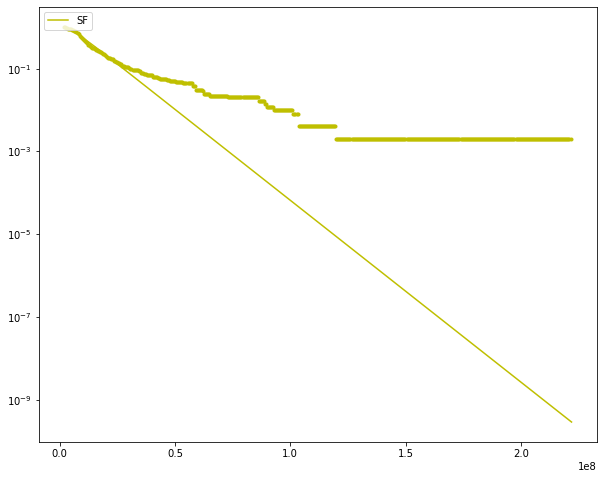

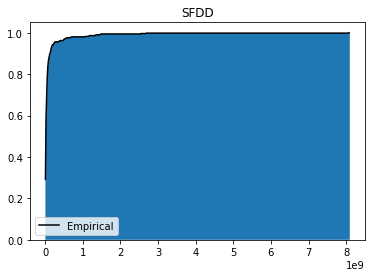

[-0.02904798  9.62623964]


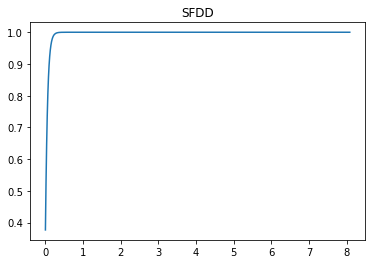

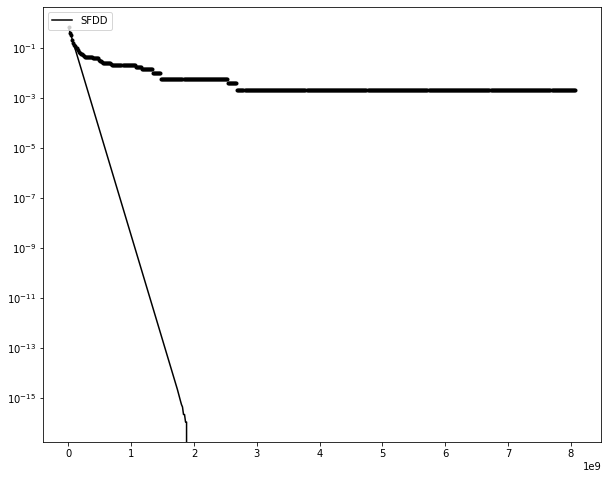

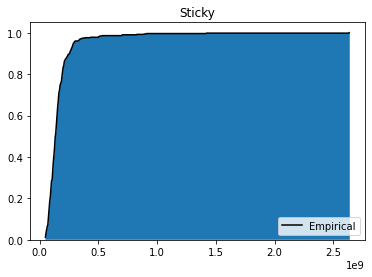

[0.06018022 6.46712047]


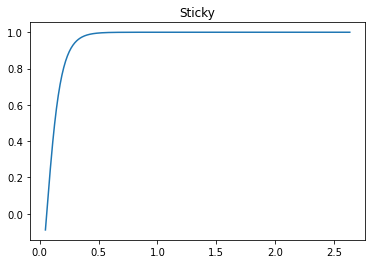

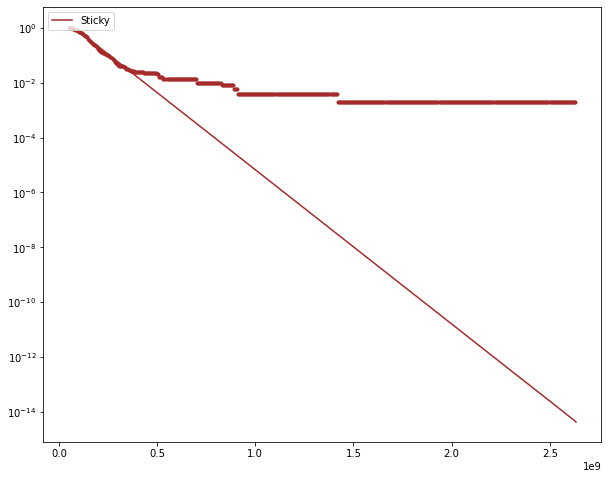

In [44]:
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, GD) 

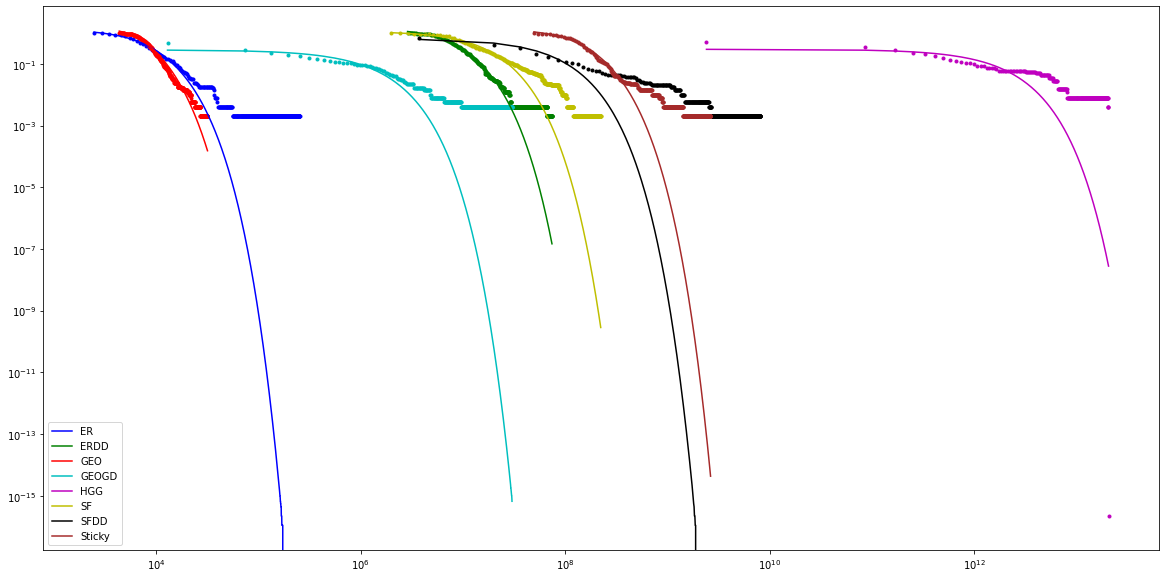

In [45]:
pair_in_one(data_name, factor, colors, GD, x_s, y_s, popt_s)

### 5. Sigmoid Function: Error Function

In [20]:
def ERF(x, x0, k):
    m = erf(k*(x-x0))
    return m

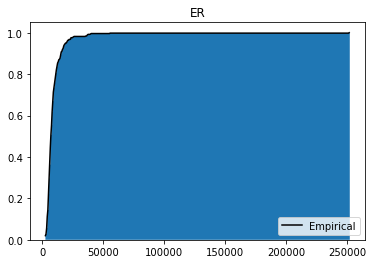

[ 0.02705915 10.6508224 ]


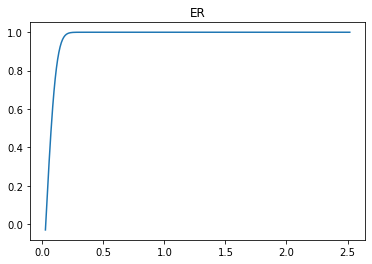

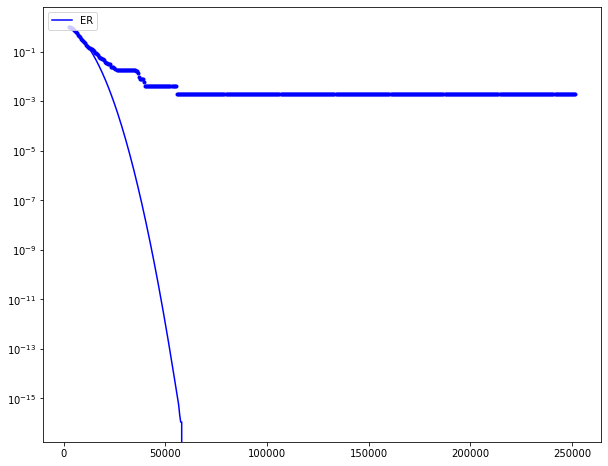

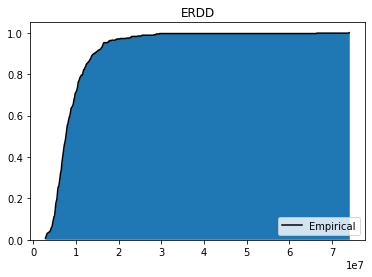

[0.35272356 1.1099311 ]


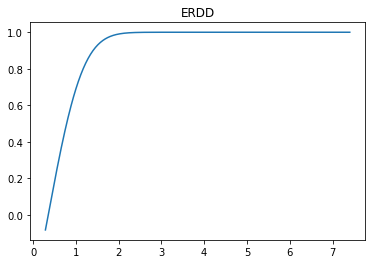

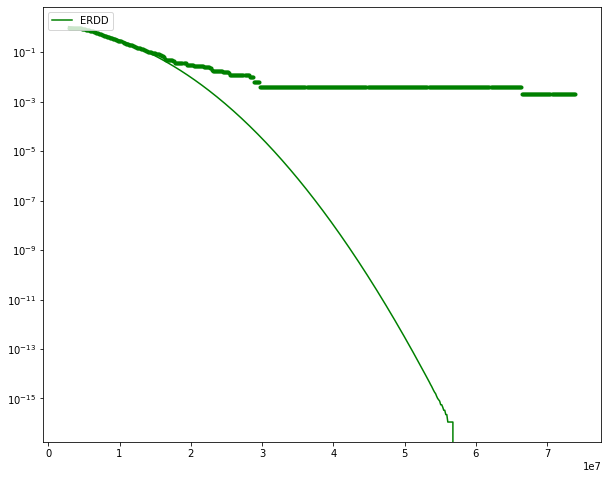

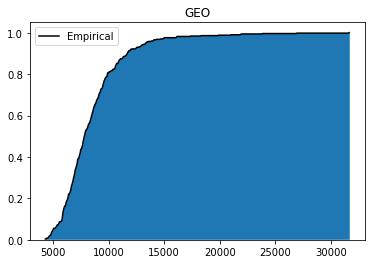

[0.49617363 1.67534378]


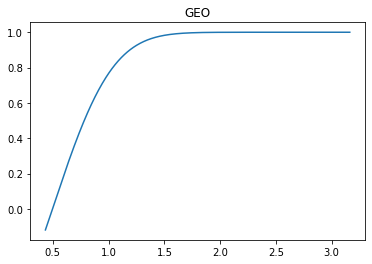

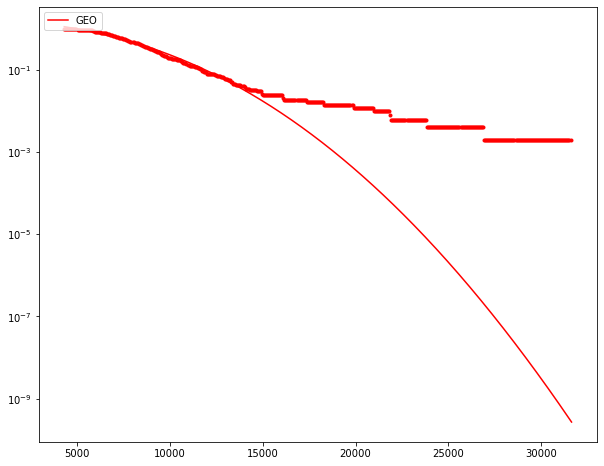

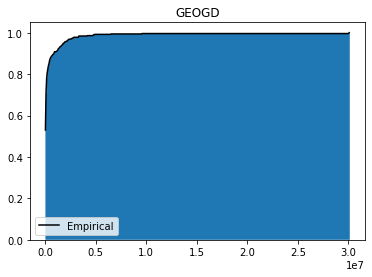

[-0.21306685  3.71453791]


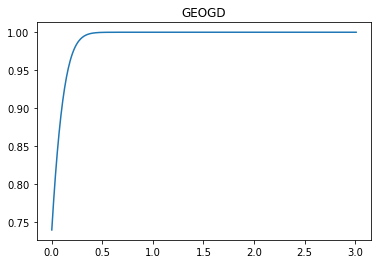

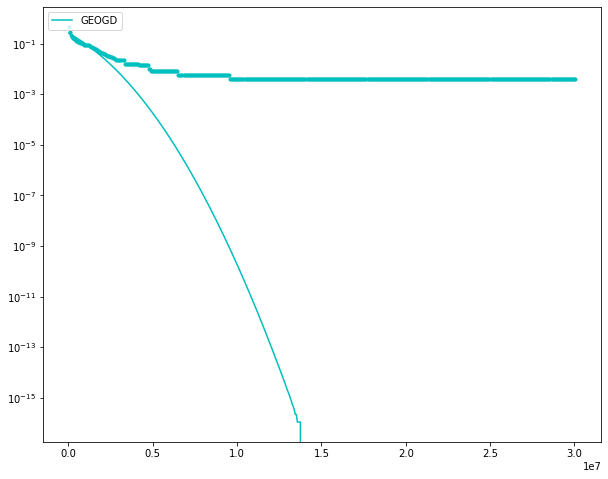

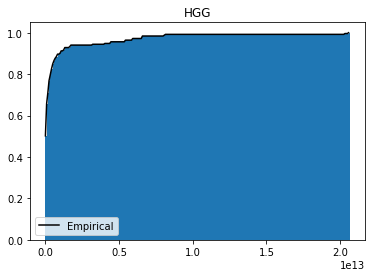

[-0.3029463   2.57463375]


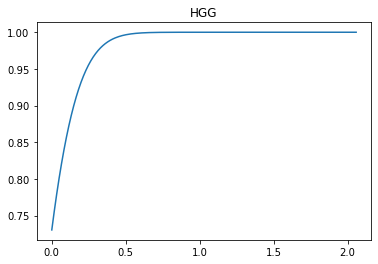

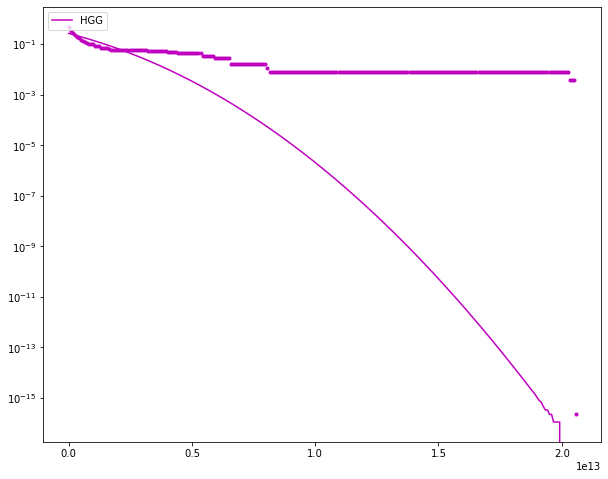

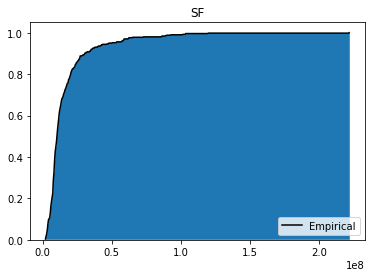

[0.01809793 4.91210885]


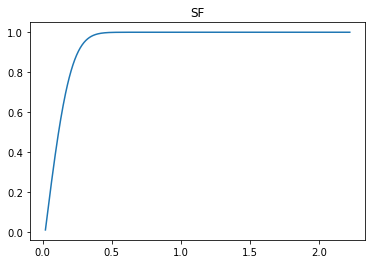

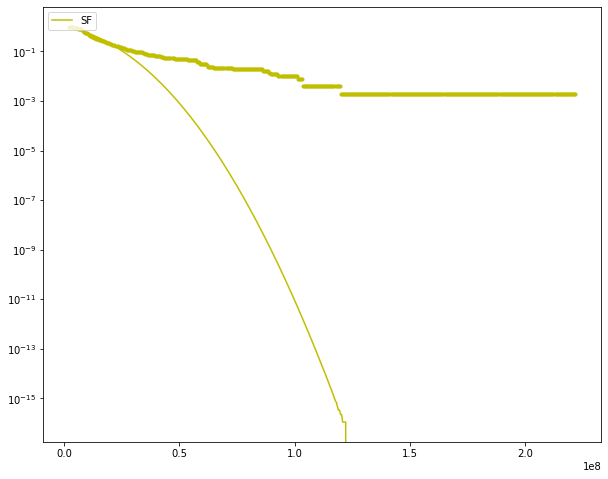

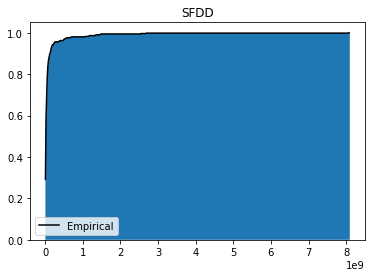

[-0.03936797  8.5157422 ]


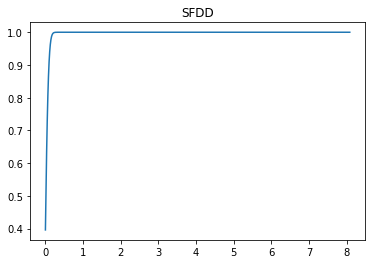

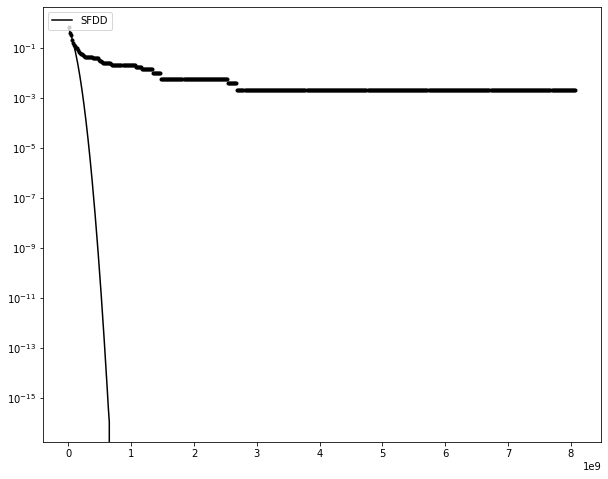

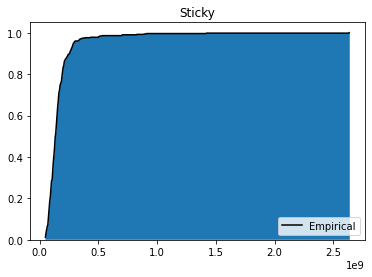

[0.05687459 6.33811039]


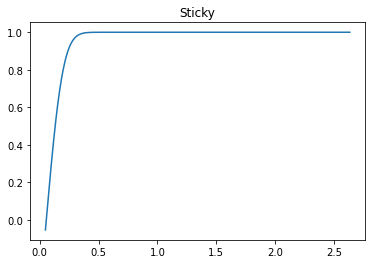

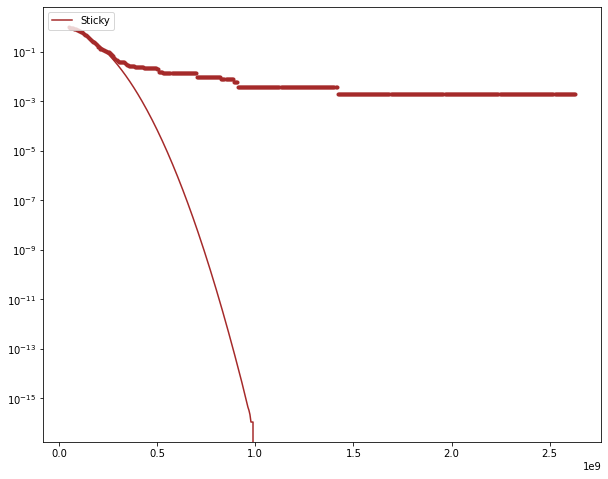

In [48]:
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, ERF) 

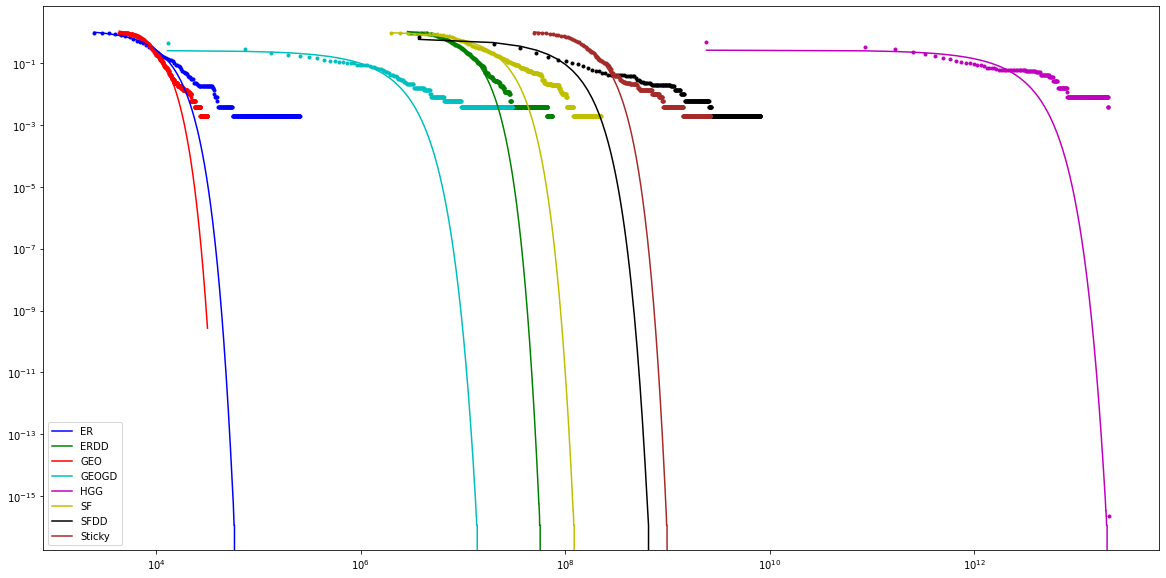

In [49]:
pair_in_one(data_name, factor, colors, ERF, x_s, y_s, popt_s)

### 6. Sigmoid Function: Algebraic Function

In [21]:
def algebra(x, x0, k):
    m = x/((1+abs(x)**k)**(1/k))
    return m

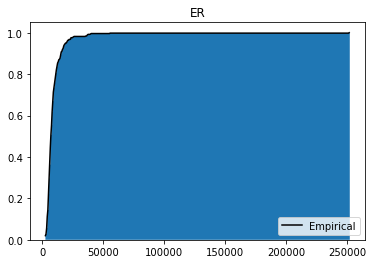

[7.43652412e-02 5.72722272e+02]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


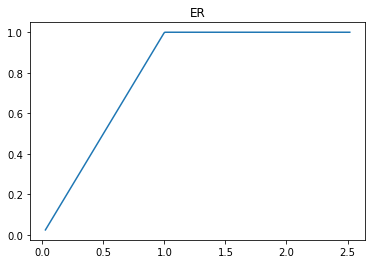

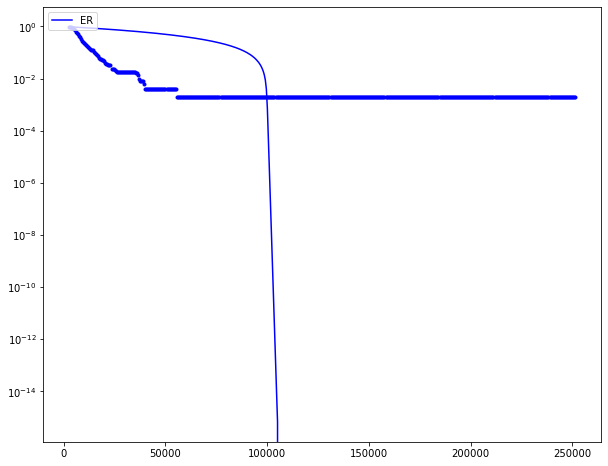

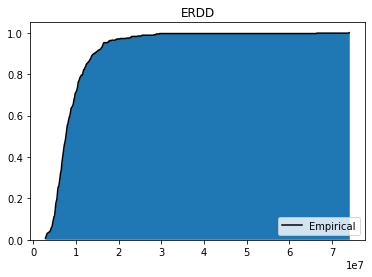

[0.78013981 2.30264388]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


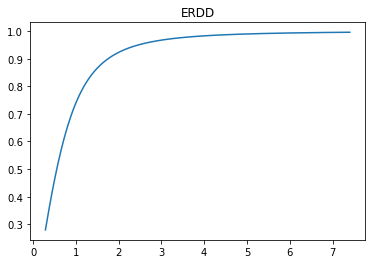

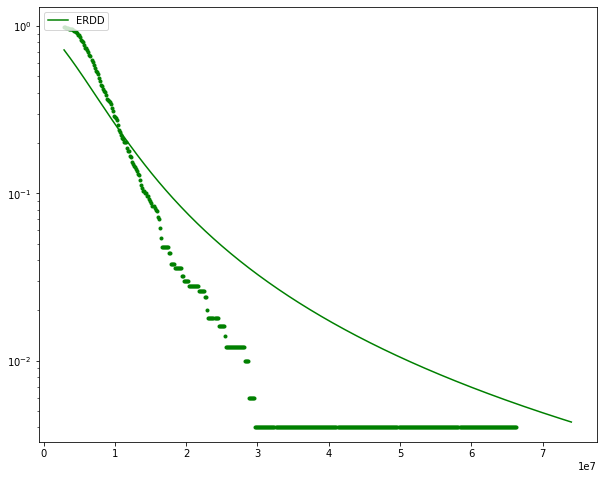

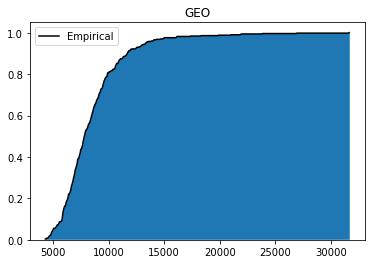

[0.78932398 2.67885723]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


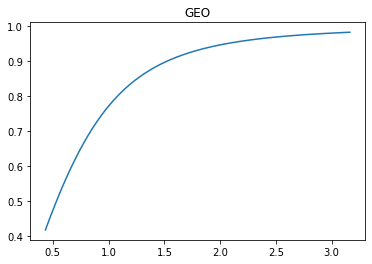

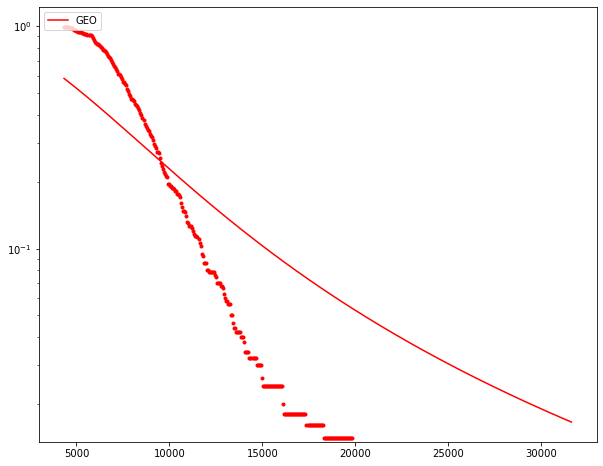

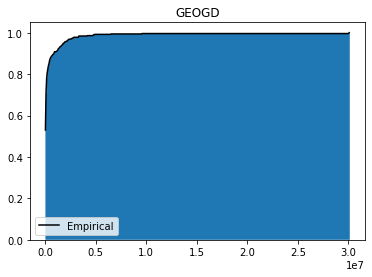

[6.54573965e-03 2.81886494e+02]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


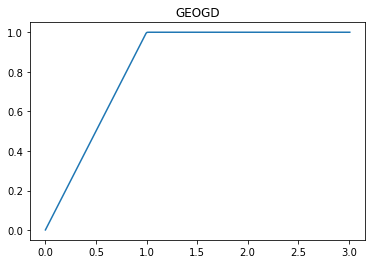

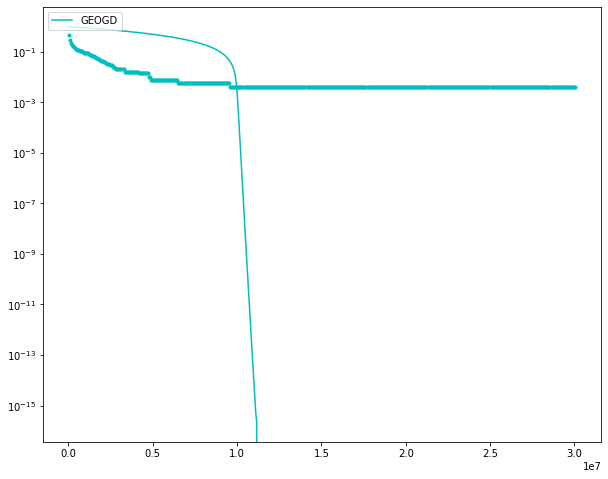

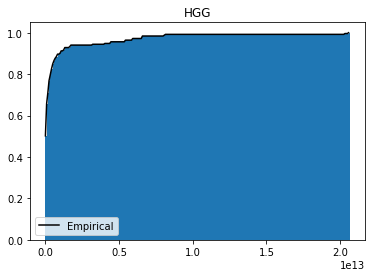

[7.81936900e-03 1.32672319e+02]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


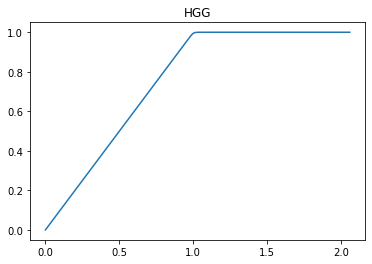

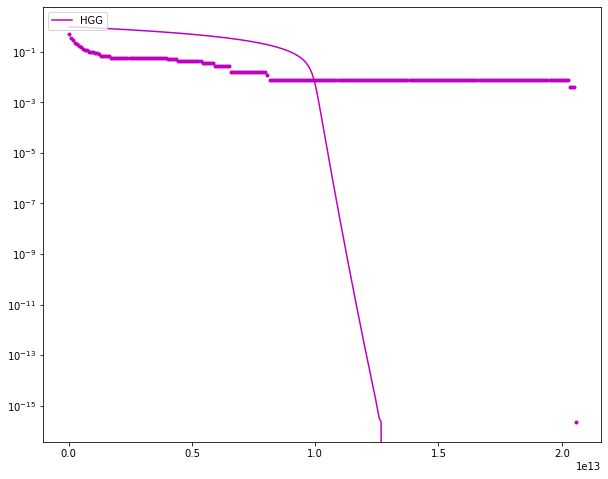

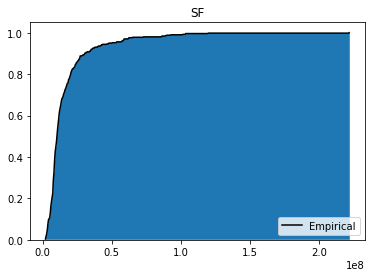

[1.06693929e-01 1.11816419e+02]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


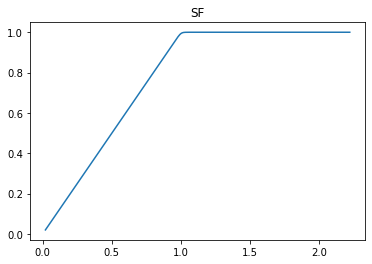

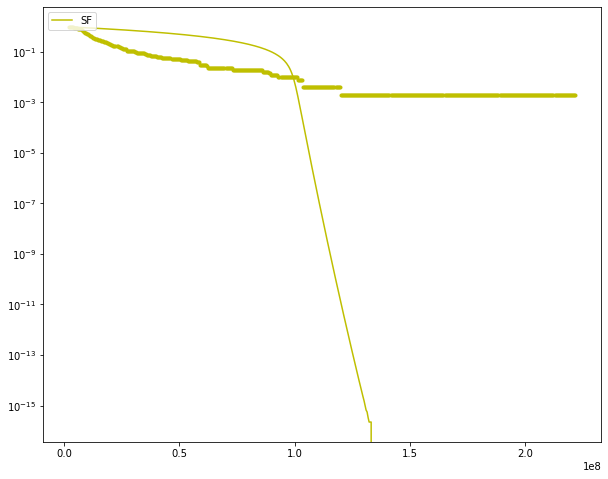

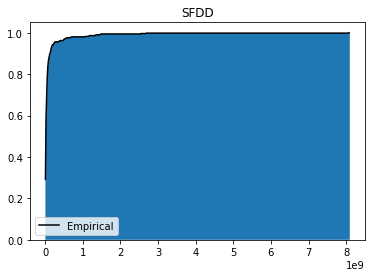

[2.92179650e-02 5.02314184e+01]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


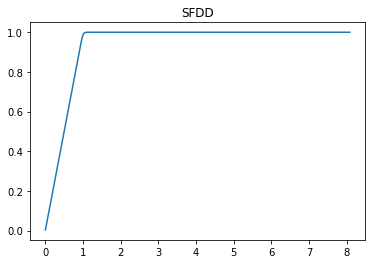

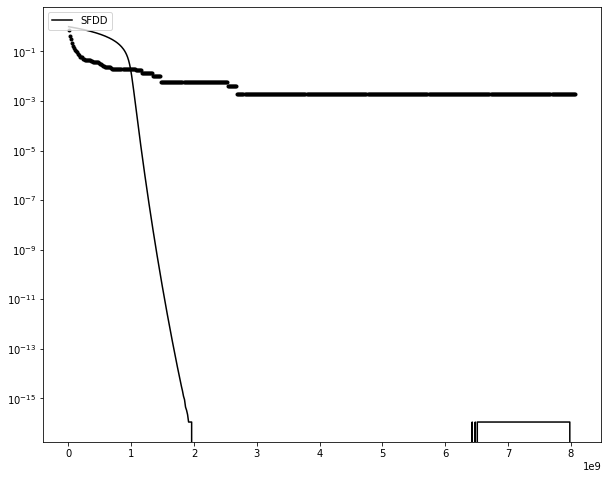

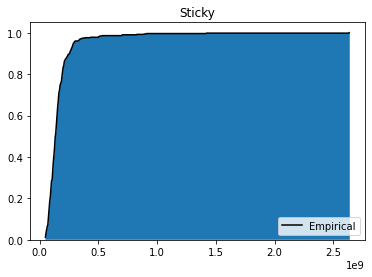

[1.38257425e-01 2.57081302e+02]


D:\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


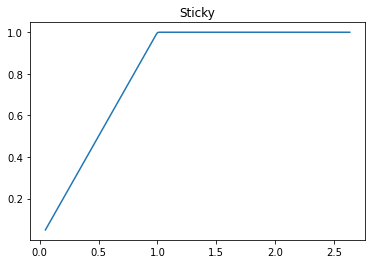

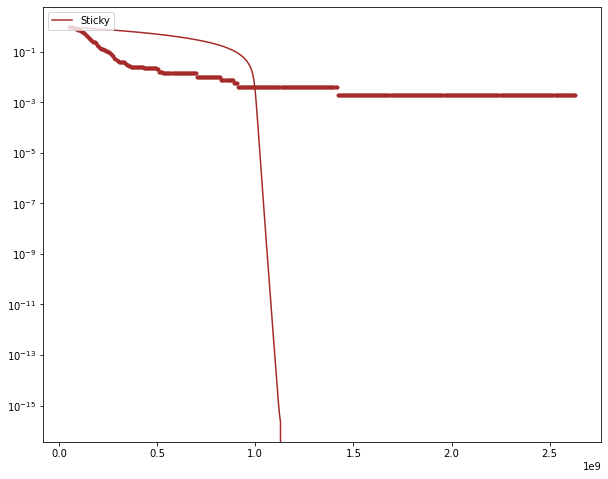

In [53]:
x_s, y_s, popt_s = cdf_sigmoid_pair(data_list, data_name, factor, colors, algebra) 

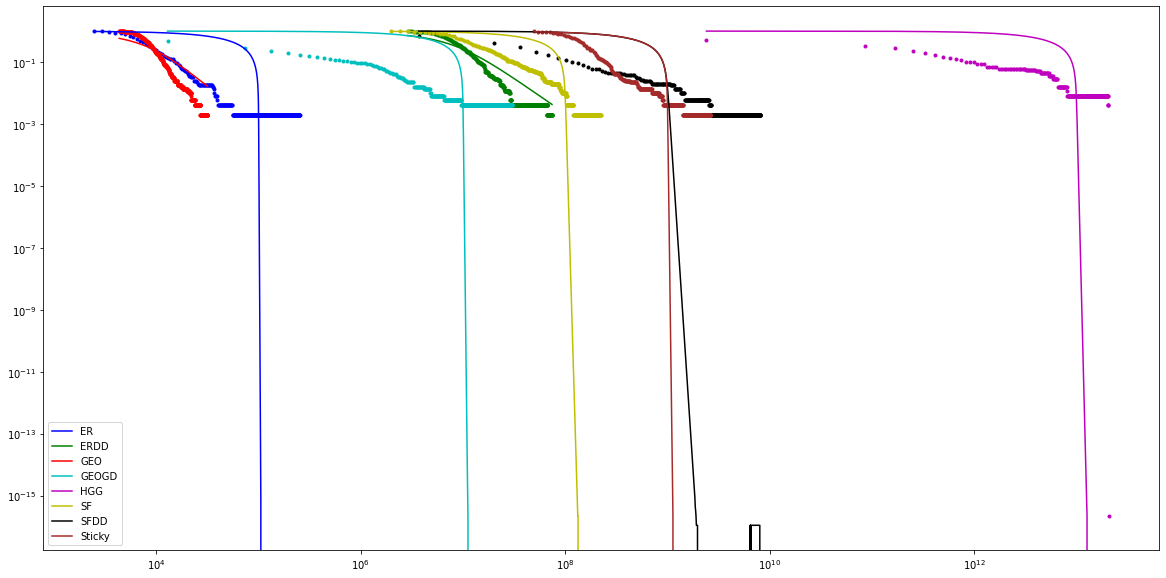

In [54]:
pair_in_one(data_name, factor, colors, algebra, x_s, y_s, popt_s)

# 2.6 weighted fitting

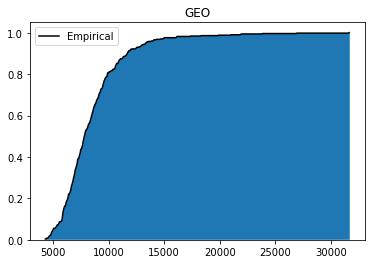

[0.80784389 7.41659107]


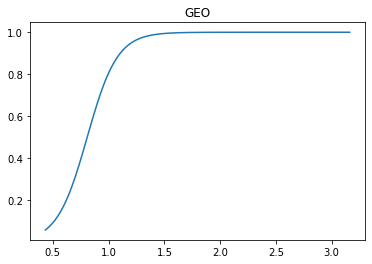

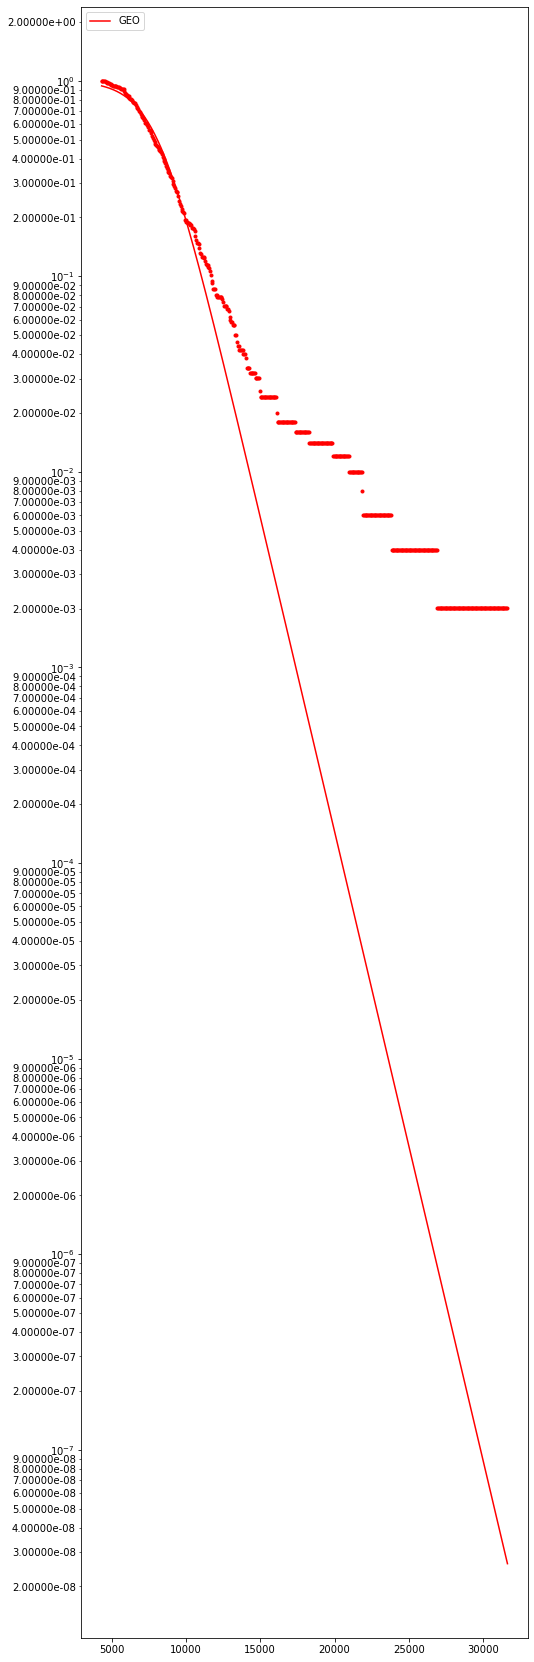

[1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00
 1.e+01 1.e+02]


In [26]:
# only on GEO which looks the best

nn_GEO = data_distance(GEO)
x1,y1 = plot_empirical_CDF(nn_GEO,True,"GEO")
popt1 = auto_curve_fit(nn_GEO, x1, y1, 1e4,logistic)
sigmoid_preview(logistic, x1,1e4,popt1,"GEO")
ytick = plot_pair(x1,y1,1e4,logistic,popt1,"GEO",'r') 

print(ytick)
    

In [27]:
origin = np.array([x1,1-y1])
print(origin.shape)

(2, 499)


In [ ]:
m = np.mean(origin[0])
print(m)

In [28]:
later_half = origin[:,origin[1]<=1e-1]
first_half = origin[:,origin[1]>1e-1]
print(first_half.shape)
print(later_half.shape)
interval = origin[:,(1e-1)<origin[1]]
interval2 = interval[:,interval[1]<=2e-1]
new = interval2[:,0].reshape((2,1))
print(new.shape)
for i in range(2,10):
    print(i*1e-1)
    inter = origin[:,(i*1e-1)<origin[1]]
    inter2 = inter[:,inter[1]<=((i+1)*1e-1)]
    new = np.hstack((new,inter2[:,:5].reshape((2,5))))

print(new.shape)

(2, 135)
(2, 364)
(2, 1)
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
(2, 41)


In [29]:
intv = origin[:,1e-2<origin[1]]
intv2 = intv[:,intv[1]<=2e-2]
new2 = intv2[:,0].reshape((2,1))

for j in range(2,10):
    print(j*1e-2)
    inter = origin[:,(j*1e-2)<origin[1]]
    inter2 = inter[:,inter[1]<=((i+1)*1e-2)]
    new2 = np.hstack((new2,inter2[:,:2].reshape((2,2))))

print(new2.shape)

0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
(2, 17)


In [30]:
# y < 1e-2
new_later_half = origin[:,origin[1]<=1e-2]
print(new_later_half.shape)

(2, 179)


(2, 237)


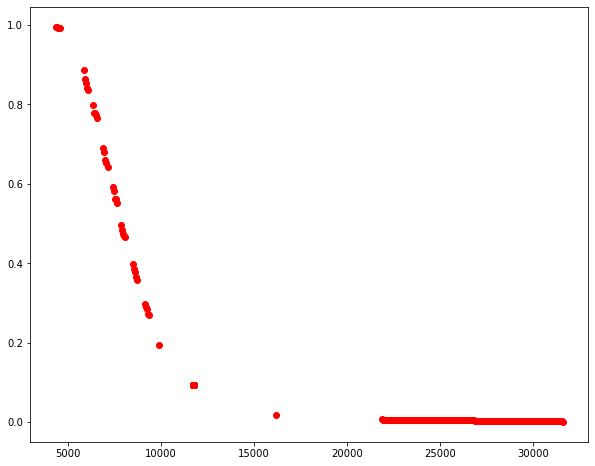

In [31]:
new = np.hstack((new,new2))
final = np.hstack((new,new_later_half))
print(final.shape)

f,ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(final[0],final[1],color='r')

(2, 179)


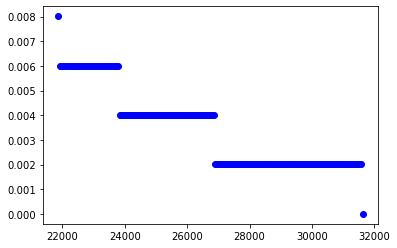

In [36]:
print(new_later_half.shape)
f, ax = plt.subplots(1,1)
ax.scatter(new_later_half[0],new_later_half[1],color='b')
plt.show()

In [136]:
x2,y2 = final[0],1-final[1]

[0.50470834 2.06927313]


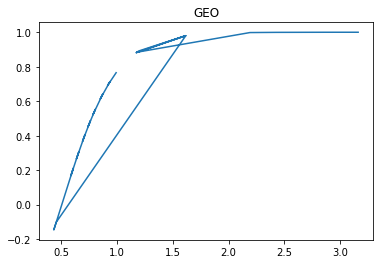

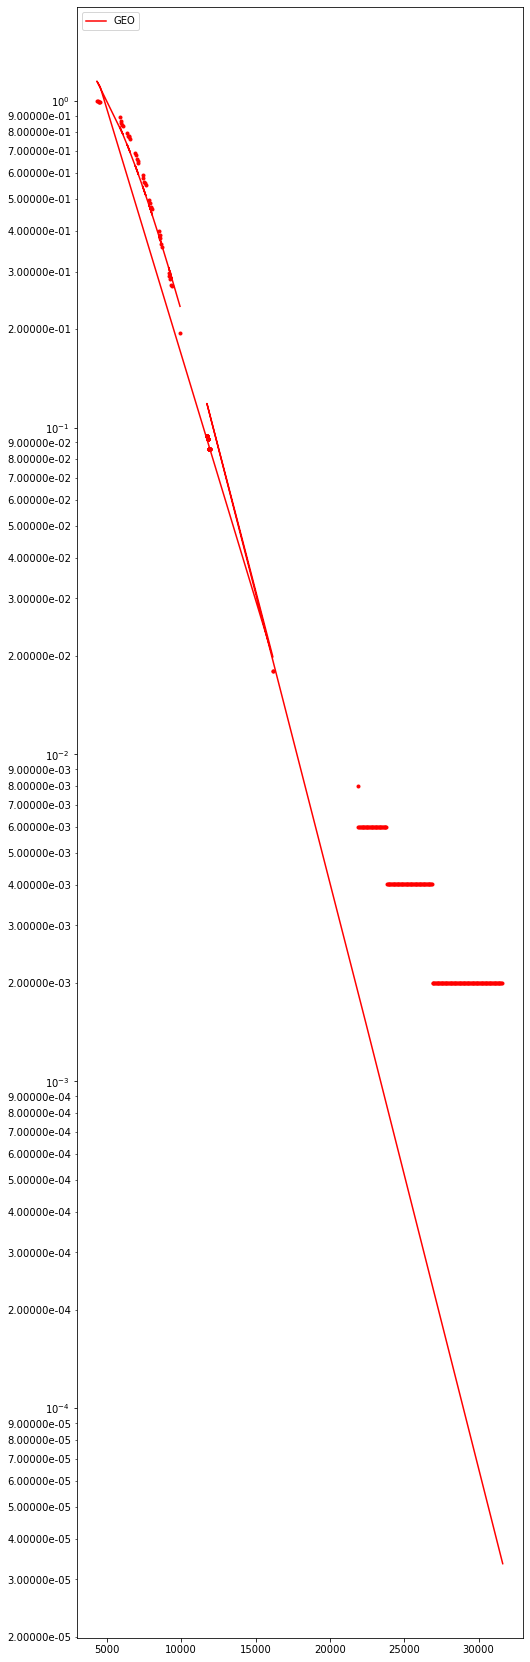

In [138]:
popt2 = auto_curve_fit(nn_GEO, x2, y2, 1e4,tanh)
sigmoid_preview(tanh, x2,1e4,popt2,"GEO")
ytick = plot_pair(x2,y2,1e4,tanh,popt2,"GEO",'r') 

## sort the array 